<a href="https://colab.research.google.com/github/luiz826/analise_de_dados/blob/main/Analisando_dados_do_Enem_na_Para%C3%ADba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISE DOS DADOS DO ENEM NA PARAÍBA DURANTE OS ANOS DE 2017 A 2019.**

O Exame Nacional do Ensino Médio é a porta de entrada para milhares de estudantes brasileiros que sonham em ingressar no ensino superior.
O Enem acontece anualmente e permite que o estudante ingresse tanto nas instituições privadas ou públicas.

Nesta analise veremos como os estudantes que fizeram o Enem na Paraíba durante os anos de 2017, 2018 e 2019 se saíram no exame. É possível que padrões sejam encontrados? ter internet, computador e celular influencia na nota? escola pública ou particular, qual tem melhor desempenho, a internet pode ser um fator de desempate? Veremos a seguir.

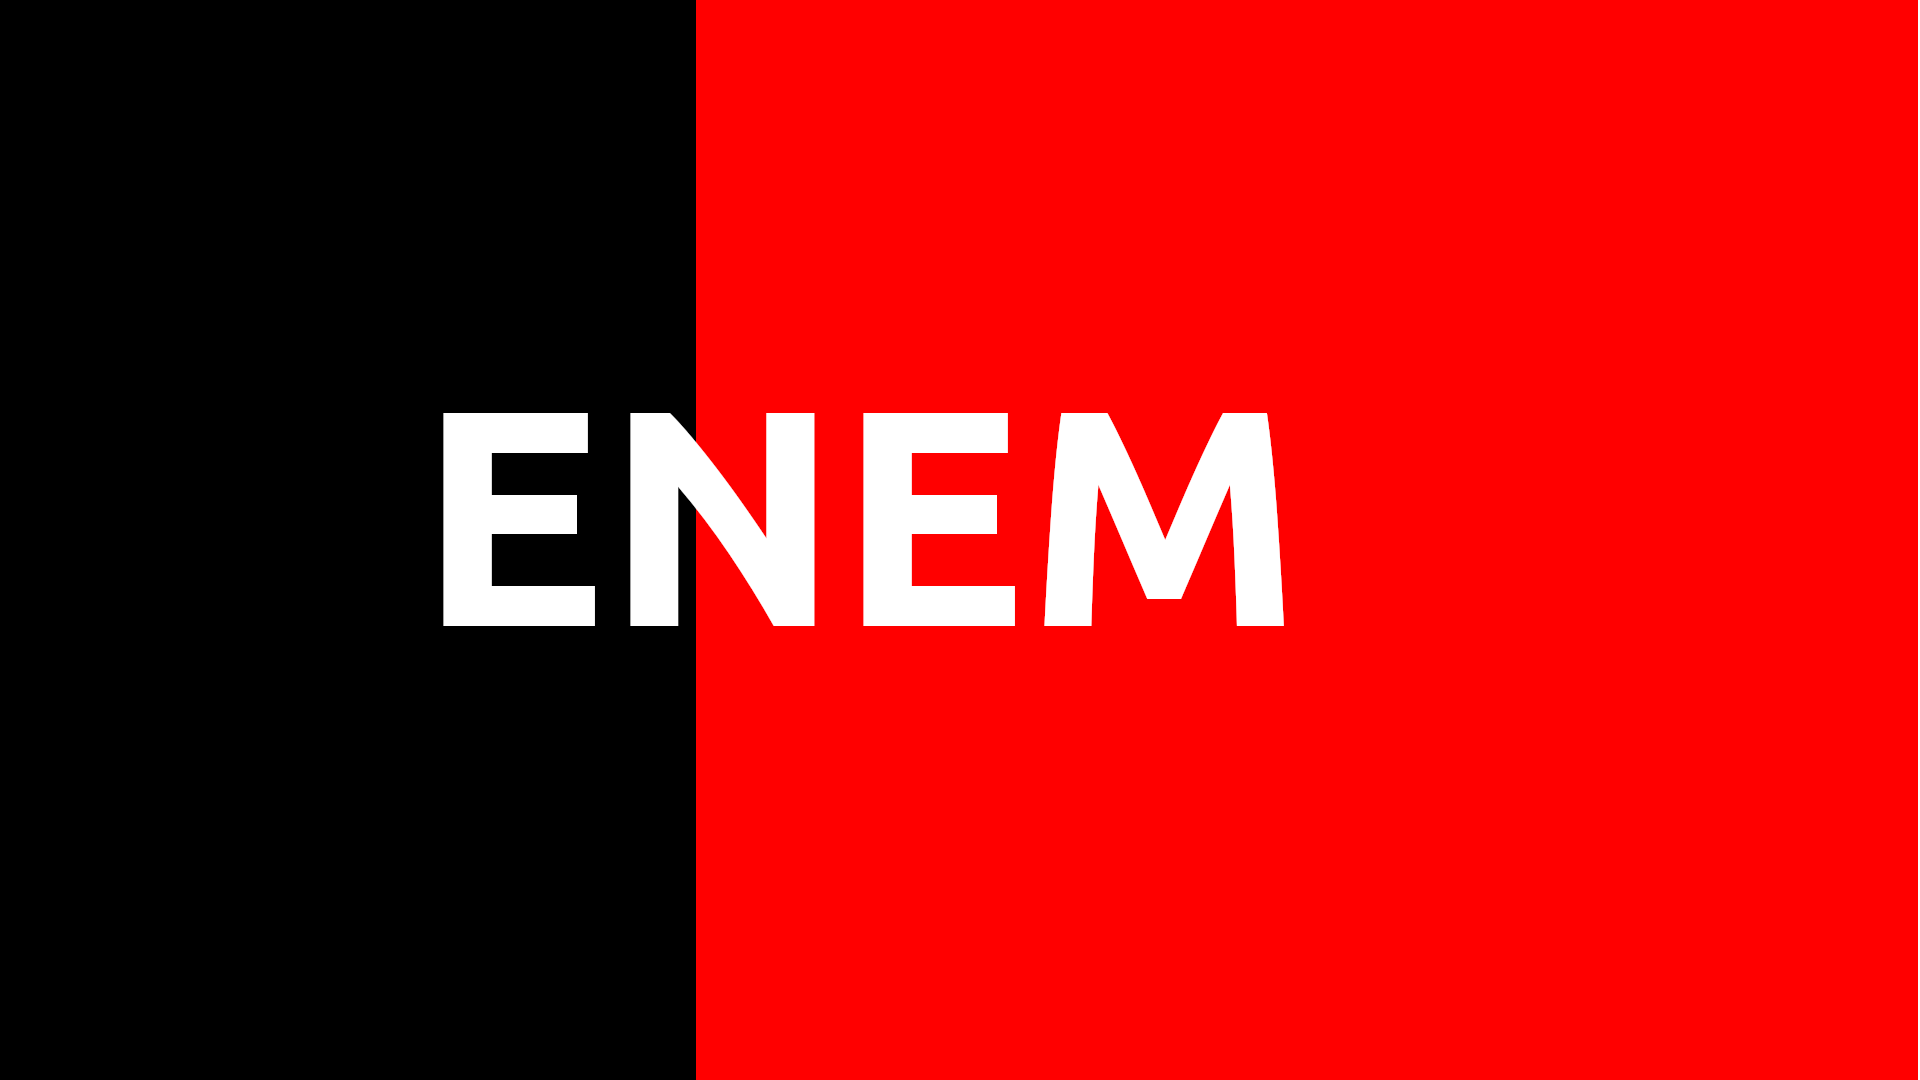

## **Dados Utilizados**

Os dados utilizados foram retirados da base de dados do Governo Federal do Brasil e se encontra disponível no site: https://dados.gov.br/dataset/microdados-do-exame-nacional-do-ensino-medio-enem



### Importando as Bibliotecas que serão utilizadas:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importação dos dados** 

Obs: os Microdados do Enem são em relação a todo o país, porém, previamente eu fiz uma separação para utilizar apenas os dados da Paraíba (Além de adicionar a variável Nota, que seria a nota geral do individuo), por questões de praticidade.



In [ ]:
dados_enem_2017 = pd.read_csv('/content/drive/My Drive/GitHub_Colab/ENEMPB2017.csv')
dados_enem_2018 = pd.read_csv('/content/drive/My Drive/GitHub_Colab/ENEMPB2018.csv')
dados_enem_2019 = pd.read_csv('/content/drive/My Drive/GitHub_Colab/ENEMPB2019.csv')

#Excluindo colunas inúteis 
dados_enem_2017 = dados_enem_2017.drop(columns=(['Unnamed: 0', 'Unnamed: 0.1']))
dados_enem_2018 = dados_enem_2018.drop(columns=(['Unnamed: 0', 'Unnamed: 0.1']))
dados_enem_2019 = dados_enem_2019.drop(columns=(['Unnamed: 0', 'Unnamed: 0.1']))

## **Analise Exploratória**

Nesta etapa, o objetivo é me familiarizar com os dados com que estou trabalhando e tentar obter insights. 

Portanto, serão feitos gráficos e tabelas com esse objetivo.



In [ ]:
dados_enem_2017.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q022,Q024,Q025,NOTA,ANO
0,Cajazeiras,PB,17.0,F,0.0,2,2,1,603.3,570.4,549.9,414.5,700.0,C,B,B,567.62,2017
1,Condado,PB,32.0,M,1.0,3,1,1,510.5,577.6,563.4,502.8,600.0,B,B,B,550.86,2017
2,Serra Branca,PB,23.0,M,0.0,1,2,1,474.2,537.9,524.4,383.5,260.0,D,B,B,436.00,2017
3,João Pessoa,PB,38.0,F,0.0,1,1,1,461.5,527.1,490.6,393.4,500.0,C,B,B,474.52,2017
4,Alagoa Nova,PB,28.0,F,0.0,3,1,1,436.4,432.7,478.5,489.7,520.0,C,A,B,471.46,2017


In [ ]:
dados_enem_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189876 entries, 0 to 189875
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NO_MUNICIPIO_RESIDENCIA  189876 non-null  object 
 1   SG_UF_RESIDENCIA         189876 non-null  object 
 2   NU_IDADE                 189875 non-null  float64
 3   TP_SEXO                  189876 non-null  object 
 4   TP_ESTADO_CIVIL          182886 non-null  float64
 5   TP_COR_RACA              189876 non-null  int64  
 6   TP_NACIONALIDADE         189876 non-null  int64  
 7   TP_ESCOLA                189876 non-null  int64  
 8   NU_NOTA_CN               134661 non-null  float64
 9   NU_NOTA_CH               140677 non-null  float64
 10  NU_NOTA_LC               140677 non-null  float64
 11  NU_NOTA_MT               134661 non-null  float64
 12  NU_NOTA_REDACAO          140677 non-null  float64
 13  Q022                     189876 non-null  object 
 14  Q024

In [ ]:
dados_enem_2017.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA,ANO
count,189875.000000,182886.000000,189876.000000,189876.000000,189876.000000,134661.000000,140677.000000,140677.00000,134661.000000,140677.000000,134441.000000,189876.0
mean,23.924529,0.191163,2.333797,1.042312,1.205876,500.716429,506.614779,499.04560,505.225226,515.464362,507.251426,2017.0
std,7.836445,0.454242,1.010111,0.229400,0.488925,68.184295,82.065107,65.27919,99.853746,192.258649,77.101693,0.0
min,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,145.040000,2017.0
25%,18.000000,0.000000,1.000000,1.000000,1.000000,447.700000,444.200000,457.20000,426.800000,440.000000,457.180000,2017.0
50%,21.000000,0.000000,3.000000,1.000000,1.000000,494.900000,504.100000,501.90000,487.600000,540.000000,501.660000,2017.0
75%,27.000000,0.000000,3.000000,1.000000,1.000000,547.700000,568.100000,544.30000,566.500000,620.000000,553.980000,2017.0
max,82.000000,3.000000,5.000000,4.000000,4.000000,839.200000,844.000000,752.00000,993.900000,980.000000,825.920000,2017.0


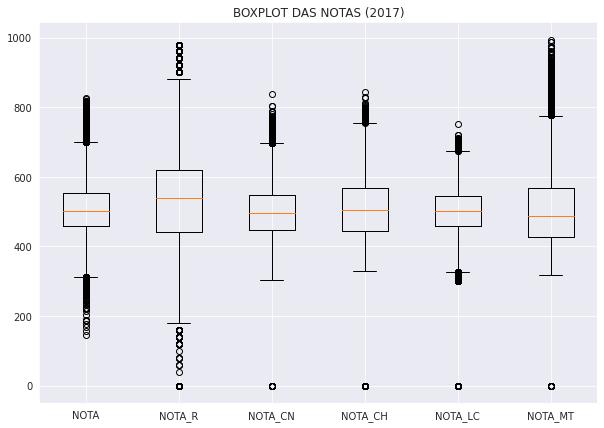

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.boxplot([ dados_enem_2017.NOTA.dropna(),       dados_enem_2017.NU_NOTA_REDACAO.dropna(), 
              dados_enem_2017.NU_NOTA_CN.dropna(), dados_enem_2017.NU_NOTA_CH.dropna(),
              dados_enem_2017.NU_NOTA_LC.dropna(), dados_enem_2017.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6], ['NOTA', 'NOTA_R', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT'])
plt.title('BOXPLOT DAS NOTAS (2017)')
plt.show()

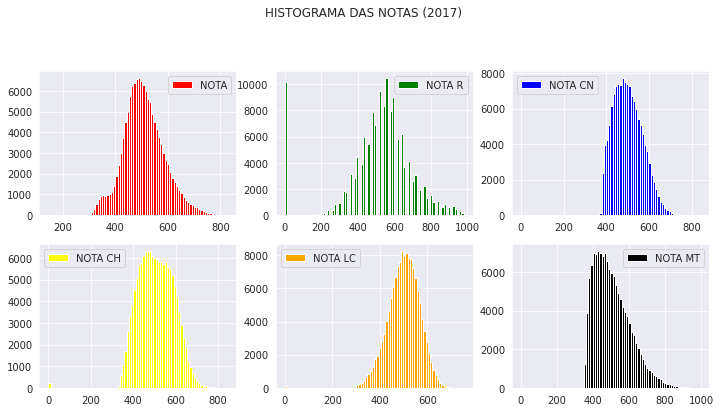

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(3,3,1)
plt.hist(dados_enem_2017.NOTA.dropna(), bins=80, label="NOTA", color="red")
plt.legend()
plt.subplot(3,3,2)
plt.hist(dados_enem_2017.NU_NOTA_REDACAO.dropna(), bins=80, label="NOTA R", color="green")
plt.legend()
plt.subplot(3,3,3)
plt.hist(dados_enem_2017.NU_NOTA_CN.dropna(), bins=80, label="NOTA CN", color="blue")
plt.legend()
plt.subplot(3,3,4)
plt.hist(dados_enem_2017.NU_NOTA_CH.dropna(), bins=80, label="NOTA CH", color="yellow")
plt.legend()
plt.subplot(3,3,5)
plt.hist(dados_enem_2017.NU_NOTA_LC.dropna(), bins=80, label="NOTA LC", color="orange")
plt.legend()
plt.subplot(3,3,6)
plt.hist(dados_enem_2017.NU_NOTA_MT.dropna(), bins=80, label="NOTA MT", color="black")
plt.legend()
plt.suptitle("HISTOGRAMA DAS NOTAS (2017)")
plt.show()

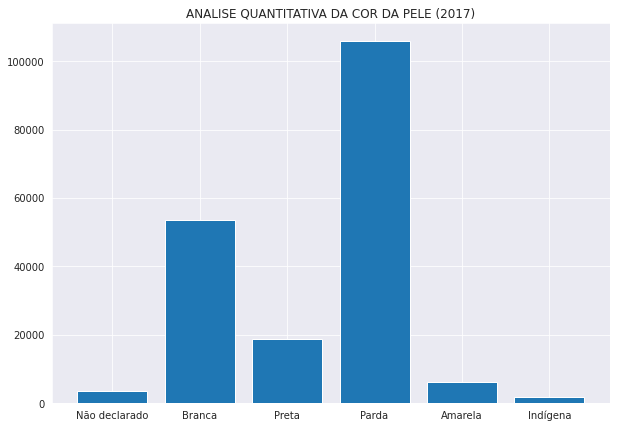

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2017.TP_COR_RACA.value_counts().index, dados_enem_2017.TP_COR_RACA.value_counts().values)
plt.xticks([0,1,2,3,4,5], ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])
plt.title('ANALISE QUANTITATIVA DA COR DA PELE (2017)')
plt.show()

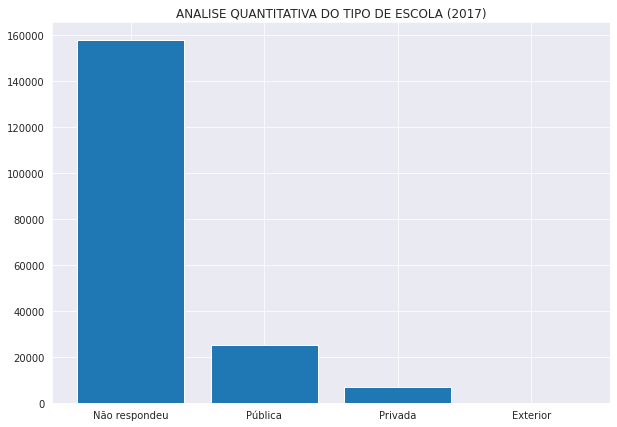

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2017.TP_ESCOLA.value_counts().index, dados_enem_2017.TP_ESCOLA.value_counts().values)
plt.xticks([1,2,3, 4], ['Não respondeu', 'Pública', 'Privada', 'Exterior'])
plt.title('ANALISE QUANTITATIVA DO TIPO DE ESCOLA (2017)')
plt.show()

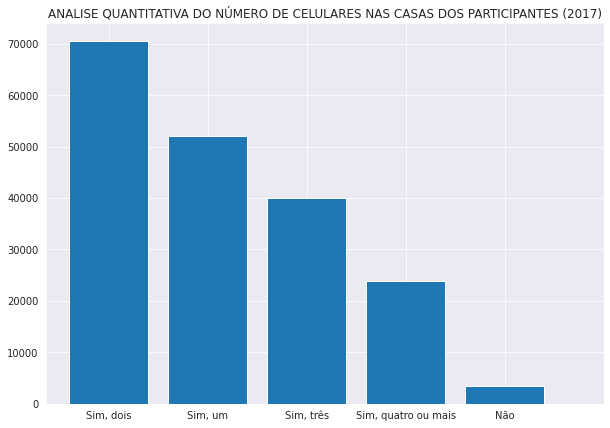

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2017.Q022.value_counts().index, dados_enem_2017.Q022.value_counts().values)
plt.xticks([0,1,2,3,4,5], ["Sim, dois", "Sim, um", "Sim, três", "Sim, quatro ou mais", "Não"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE CELULARES NAS CASAS DOS PARTICIPANTES (2017)')
plt.show()

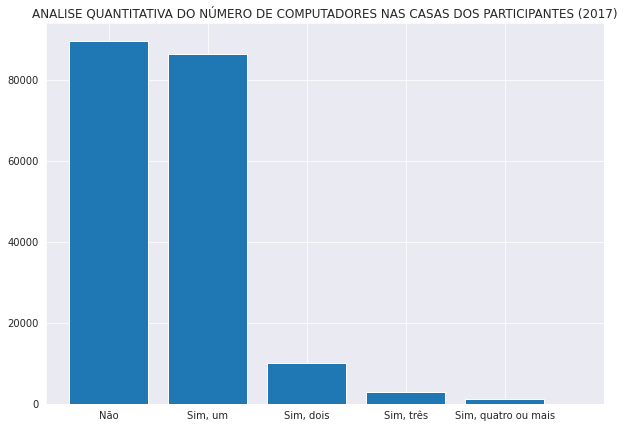

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2017.Q024.value_counts().index, dados_enem_2017.Q024.value_counts().values)
plt.xticks([0,1,2,3,4,5], ["Não", "Sim, um", "Sim, dois", "Sim, três", "Sim, quatro ou mais"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE COMPUTADORES NAS CASAS DOS PARTICIPANTES (2017)')
plt.show()

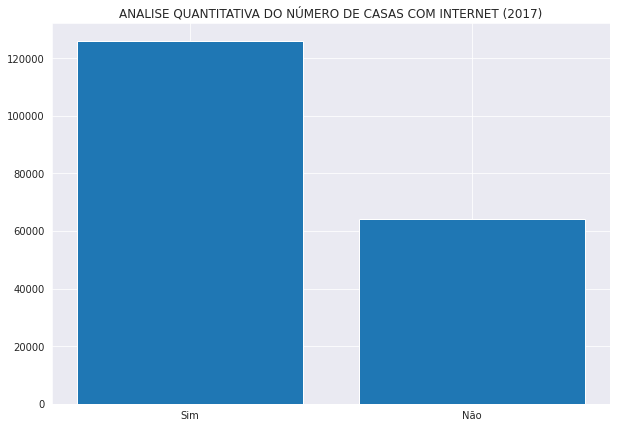

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2017.Q025.value_counts().index, dados_enem_2017.Q025.value_counts().values)
plt.xticks([0,1], ["Sim", "Não"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE CASAS COM INTERNET (2017)')
plt.show()

### Primeiras impressões dos dados de 2017

* Há alguns dados faltantes e nós vamos tentar descobrir o porquê disso;
* A matéria que está mais distriubuida é Redação, enquanto matemática é a que possui mais outliers "positivos" digamos assim;
* Há uma grande superioridade númerica da cor de pele Parda;
* Por que tanta gente não respondeu sobre o tipo de escola?
* Chama atenção que o número de casas sem internet é quase metade das casas com internet, será que isso possui influencia nas notas?

In [ ]:
dados_enem_2018.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q022,Q024,Q025,NOTA,ANO
0,João Pessoa,PB,23.0,F,0.0,1,1,1,461.8,564.0,466.8,538.8,580.0,B,B,B,522.28,2018
1,Lagoa Seca,PB,18.0,F,0.0,1,1,2,479.4,539.0,553.8,517.3,620.0,D,A,B,541.90,2018
2,Santana dos Garrotes,PB,25.0,F,0.0,3,1,1,654.1,666.6,588.3,735.6,820.0,B,B,B,692.92,2018
3,João Pessoa,PB,23.0,F,0.0,1,1,1,506.5,567.9,518.2,485.0,440.0,C,A,A,503.52,2018
4,Campina Grande,PB,27.0,F,1.0,1,1,1,455.0,434.4,440.7,588.0,420.0,C,A,B,467.62,2018


In [ ]:
dados_enem_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152049 entries, 0 to 152048
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NO_MUNICIPIO_RESIDENCIA  152049 non-null  object 
 1   SG_UF_RESIDENCIA         152049 non-null  object 
 2   NU_IDADE                 152049 non-null  float64
 3   TP_SEXO                  152049 non-null  object 
 4   TP_ESTADO_CIVIL          146685 non-null  float64
 5   TP_COR_RACA              152049 non-null  int64  
 6   TP_NACIONALIDADE         152049 non-null  int64  
 7   TP_ESCOLA                152049 non-null  int64  
 8   NU_NOTA_CN               114211 non-null  float64
 9   NU_NOTA_CH               119687 non-null  float64
 10  NU_NOTA_LC               119687 non-null  float64
 11  NU_NOTA_MT               114211 non-null  float64
 12  NU_NOTA_REDACAO          119687 non-null  float64
 13  Q022                     152049 non-null  object 
 14  Q024

In [ ]:
dados_enem_2018.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA,ANO
count,152049.000000,146685.000000,152049.000000,152049.000000,152049.000000,114211.000000,119687.000000,119687.000000,114211.000000,119687.000000,113941.000000,152049.0
mean,23.125953,0.158101,2.333649,1.041355,1.256819,482.180127,557.183550,513.366325,523.535267,500.225421,517.200061,2018.0
std,7.674133,0.421664,1.008900,0.222066,0.649849,70.211156,80.672402,72.218664,98.688192,188.366958,80.095306,0.0
min,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0
25%,18.000000,0.000000,1.000000,1.000000,1.000000,427.900000,495.900000,462.700000,448.100000,360.000000,458.240000,2018.0
50%,20.000000,0.000000,3.000000,1.000000,1.000000,470.800000,567.200000,514.800000,504.600000,500.000000,506.720000,2018.0
75%,26.000000,0.000000,3.000000,1.000000,1.000000,526.800000,618.700000,565.800000,581.400000,620.000000,565.960000,2018.0
max,77.000000,3.000000,5.000000,4.000000,4.000000,869.600000,840.900000,782.000000,994.400000,1000.000000,848.900000,2018.0


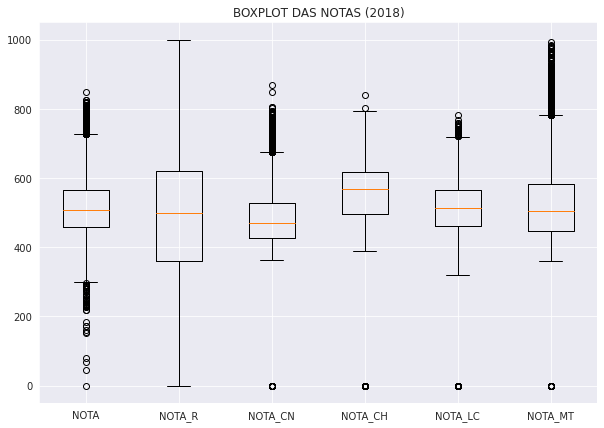

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.boxplot([ dados_enem_2018.NOTA.dropna(),       dados_enem_2018.NU_NOTA_REDACAO.dropna(), 
              dados_enem_2018.NU_NOTA_CN.dropna(), dados_enem_2018.NU_NOTA_CH.dropna(),
              dados_enem_2018.NU_NOTA_LC.dropna(), dados_enem_2018.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6], ['NOTA', 'NOTA_R', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT'])
plt.title('BOXPLOT DAS NOTAS (2018)')
plt.show()

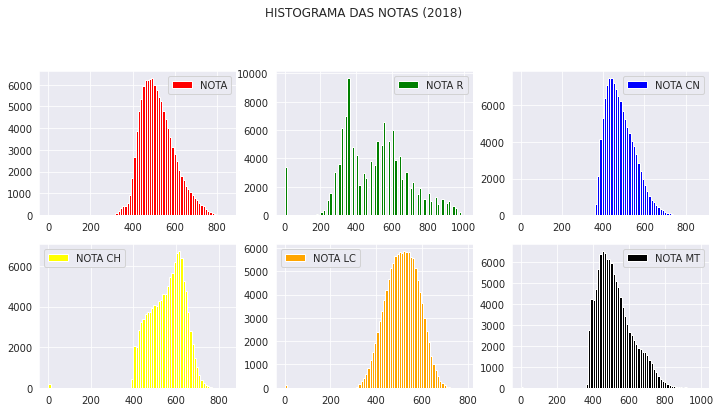

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(3,3,1)
plt.hist(dados_enem_2018.NOTA.dropna(), bins=80, label="NOTA", color="red")
plt.legend()
plt.subplot(3,3,2)
plt.hist(dados_enem_2018.NU_NOTA_REDACAO.dropna(), bins=80, label="NOTA R", color="green")
plt.legend()
plt.subplot(3,3,3)
plt.hist(dados_enem_2018.NU_NOTA_CN.dropna(), bins=80, label="NOTA CN", color="blue")
plt.legend()
plt.subplot(3,3,4)
plt.hist(dados_enem_2018.NU_NOTA_CH.dropna(), bins=80, label="NOTA CH", color="yellow")
plt.legend()
plt.subplot(3,3,5)
plt.hist(dados_enem_2018.NU_NOTA_LC.dropna(), bins=80, label="NOTA LC", color="orange")
plt.legend()
plt.subplot(3,3,6)
plt.hist(dados_enem_2018.NU_NOTA_MT.dropna(), bins=80, label="NOTA MT", color="black")
plt.legend()
plt.suptitle("HISTOGRAMA DAS NOTAS (2018)")
plt.show()

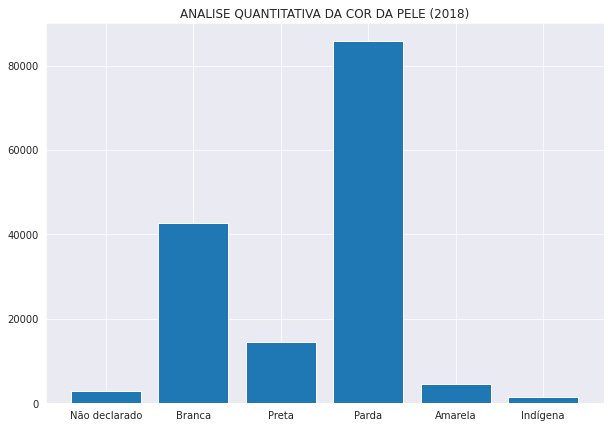

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2018.TP_COR_RACA.value_counts().index, dados_enem_2018.TP_COR_RACA.value_counts().values)
plt.xticks([0,1,2,3,4,5], ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])
plt.title('ANALISE QUANTITATIVA DA COR DA PELE (2018)')
plt.show()

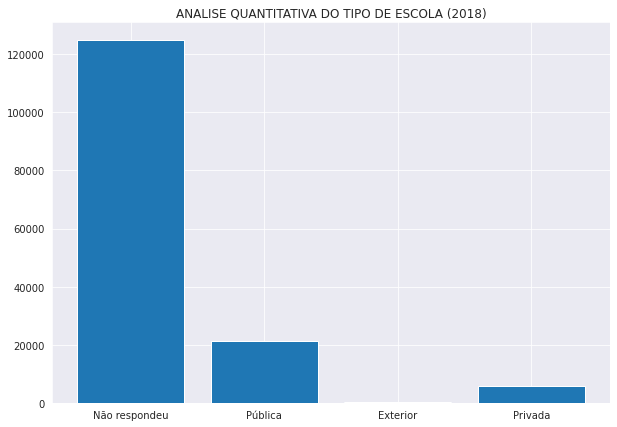

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2018.TP_ESCOLA.value_counts().index, dados_enem_2018.TP_ESCOLA.value_counts().values)
plt.xticks([1,2,3, 4], ['Não respondeu', 'Pública', 'Exterior', 'Privada'])
plt.title('ANALISE QUANTITATIVA DO TIPO DE ESCOLA (2018)')
plt.show()

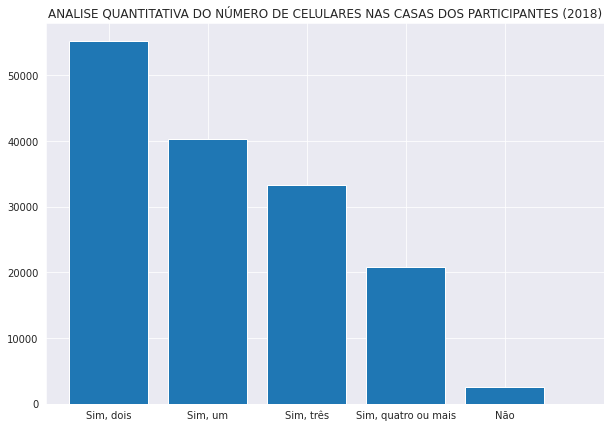

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2018.Q022.value_counts().index, dados_enem_2018.Q022.value_counts().values)
plt.xticks([0,1,2,3,4,5], ["Sim, dois", "Sim, um", "Sim, três", "Sim, quatro ou mais", "Não"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE CELULARES NAS CASAS DOS PARTICIPANTES (2018)')
plt.show()

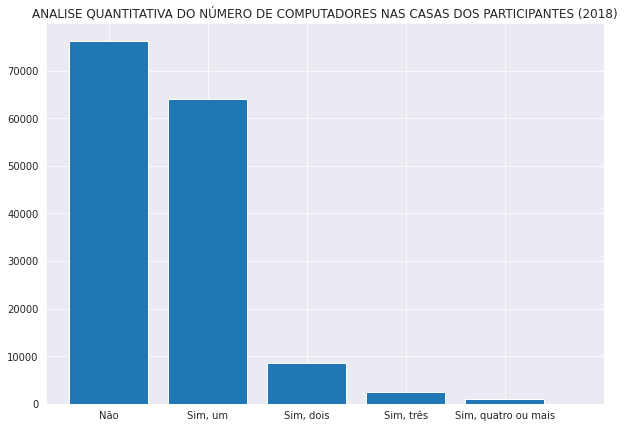

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2018.Q024.value_counts().index, dados_enem_2018.Q024.value_counts().values)
plt.xticks([0,1,2,3,4,5], ["Não", "Sim, um", "Sim, dois", "Sim, três", "Sim, quatro ou mais"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE COMPUTADORES NAS CASAS DOS PARTICIPANTES (2018)')
plt.show()

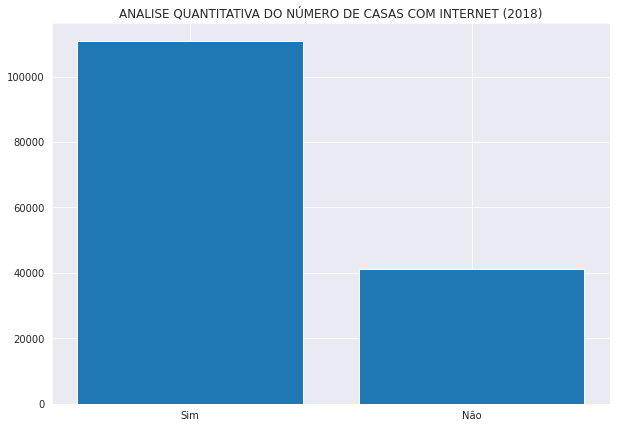

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2018.Q025.value_counts().index, dados_enem_2018.Q025.value_counts().values)
plt.xticks([0,1], ["Sim", "Não"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE CASAS COM INTERNET (2018)')
plt.show()


### Primeiras impressões dos dados de 2018

* Percebe-se que não há outliers na prova de Redação, pois os dados estão muito distribuidos;
* As respostas sobre o quesito social estão parecidas com a do ano de 2017, porém o número de casas com internet aumentou ligeiramente.

In [ ]:
dados_enem_2019.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q022,Q024,Q025,NOTA,ANO
0,João Pessoa,PB,22,M,1,3,1,1,NaN,NaN,NaN,NaN,NaN,B,B,B,NaN,2019
1,Campina Grande,PB,19,M,1,1,1,1,NaN,NaN,NaN,NaN,NaN,C,A,B,NaN,2019
2,Tavares,PB,21,F,1,3,1,1,620.7,654.7,607.4,831.4,920.0,E,C,B,726.84,2019
3,Bonito de Santa Fé,PB,36,M,1,3,1,1,NaN,NaN,NaN,NaN,NaN,B,A,B,NaN,2019
4,São José de Piranhas,PB,20,F,1,0,1,1,NaN,NaN,NaN,NaN,NaN,C,A,B,NaN,2019


In [ ]:
dados_enem_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147780 entries, 0 to 147779
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NO_MUNICIPIO_RESIDENCIA  147780 non-null  object 
 1   SG_UF_RESIDENCIA         147780 non-null  object 
 2   NU_IDADE                 147780 non-null  int64  
 3   TP_SEXO                  147780 non-null  object 
 4   TP_ESTADO_CIVIL          147780 non-null  int64  
 5   TP_COR_RACA              147780 non-null  int64  
 6   TP_NACIONALIDADE         147780 non-null  int64  
 7   TP_ESCOLA                147780 non-null  int64  
 8   NU_NOTA_CN               114235 non-null  float64
 9   NU_NOTA_CH               118901 non-null  float64
 10  NU_NOTA_LC               118901 non-null  float64
 11  NU_NOTA_MT               114235 non-null  float64
 12  NU_NOTA_REDACAO          118901 non-null  float64
 13  Q022                     147780 non-null  object 
 14  Q024

In [ ]:
dados_enem_2019.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA,ANO
count,147780.000000,147780.000000,147780.000000,147780.000000,147780.000000,114235.000000,118901.000000,118901.000000,114235.000000,118901.000000,114046.000000,147780.0
mean,22.762891,1.107809,2.334084,1.033225,1.262424,467.781141,495.907691,510.048163,509.805636,574.257071,513.653453,2019.0
std,7.568315,0.469928,1.013950,0.200434,0.517969,73.098119,81.432154,64.316392,104.205398,188.345193,80.839619,0.0
min,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0
25%,18.000000,1.000000,1.000000,1.000000,1.000000,411.100000,436.100000,471.400000,428.100000,500.000000,458.480000,2019.0
50%,20.000000,1.000000,3.000000,1.000000,1.000000,458.200000,496.600000,514.700000,486.000000,580.000000,505.240000,2019.0
75%,25.000000,1.000000,3.000000,1.000000,1.000000,518.100000,554.900000,554.100000,575.600000,680.000000,562.880000,2019.0
max,92.000000,4.000000,5.000000,4.000000,3.000000,838.600000,809.400000,753.100000,985.500000,1000.000000,819.960000,2019.0


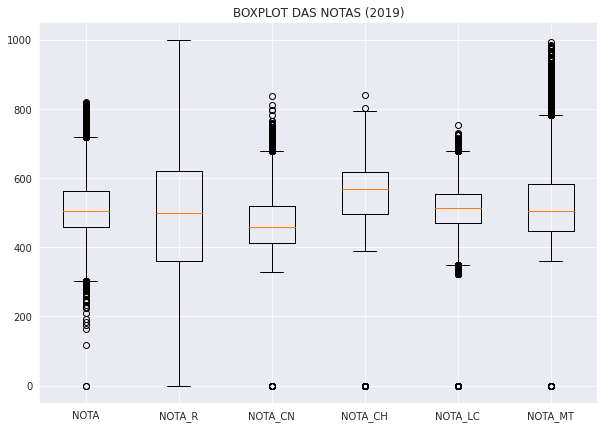

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.boxplot([ dados_enem_2019.NOTA.dropna(),       dados_enem_2018.NU_NOTA_REDACAO.dropna(), 
              dados_enem_2019.NU_NOTA_CN.dropna(), dados_enem_2018.NU_NOTA_CH.dropna(),
              dados_enem_2019.NU_NOTA_LC.dropna(), dados_enem_2018.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6], ['NOTA', 'NOTA_R', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT'])
plt.title('BOXPLOT DAS NOTAS (2019)')
plt.show()

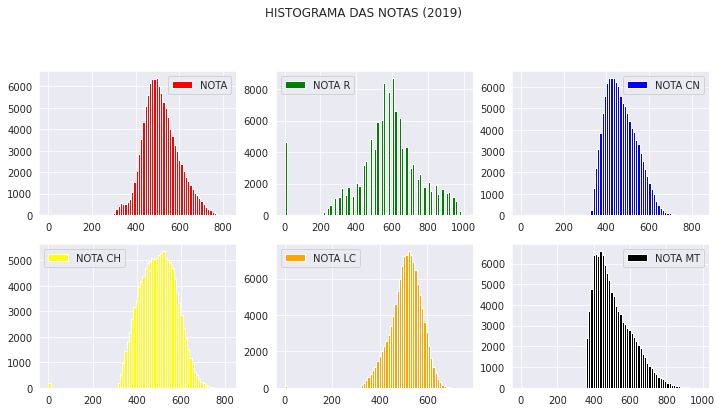

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(3,3,1)
plt.hist(dados_enem_2019.NOTA.dropna(), bins=80, label="NOTA", color="red")
plt.legend()
plt.subplot(3,3,2)
plt.hist(dados_enem_2019.NU_NOTA_REDACAO.dropna(), bins=80, label="NOTA R", color="green")
plt.legend()
plt.subplot(3,3,3)
plt.hist(dados_enem_2019.NU_NOTA_CN.dropna(), bins=80, label="NOTA CN", color="blue")
plt.legend()
plt.subplot(3,3,4)
plt.hist(dados_enem_2019.NU_NOTA_CH.dropna(), bins=80, label="NOTA CH", color="yellow")
plt.legend()
plt.subplot(3,3,5)
plt.hist(dados_enem_2019.NU_NOTA_LC.dropna(), bins=80, label="NOTA LC", color="orange")
plt.legend()
plt.subplot(3,3,6)
plt.hist(dados_enem_2019.NU_NOTA_MT.dropna(), bins=80, label="NOTA MT", color="black")
plt.legend()
plt.suptitle("HISTOGRAMA DAS NOTAS (2019)")
plt.show()

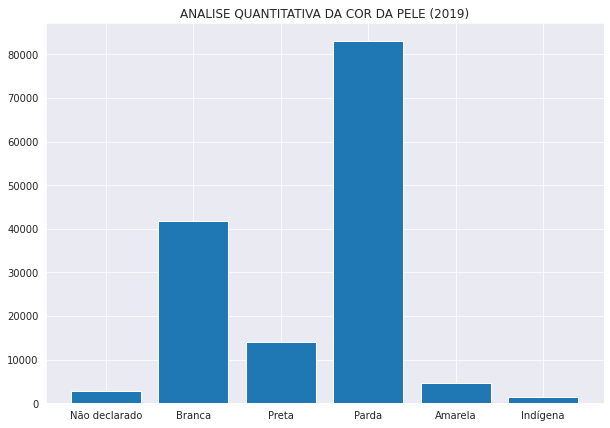

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2019.TP_COR_RACA.value_counts().index, dados_enem_2019.TP_COR_RACA.value_counts().values)
plt.xticks([0,1,2,3,4,5], ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])
plt.title('ANALISE QUANTITATIVA DA COR DA PELE (2019)')
plt.show()

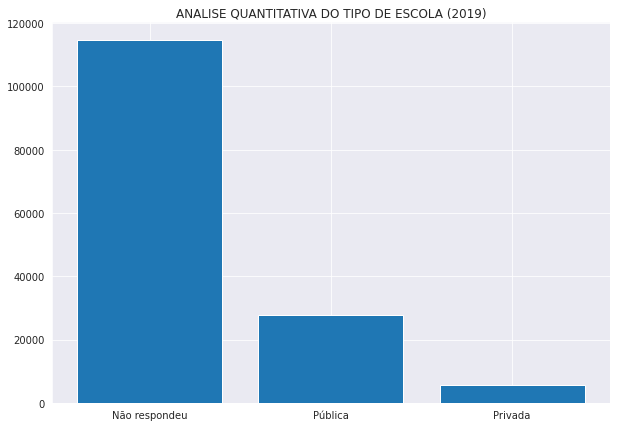

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2019.TP_ESCOLA.value_counts().index, dados_enem_2019.TP_ESCOLA.value_counts().values)
plt.xticks([1,2,3], ['Não respondeu', 'Pública', 'Privada'])
plt.title('ANALISE QUANTITATIVA DO TIPO DE ESCOLA (2019)')
plt.show()

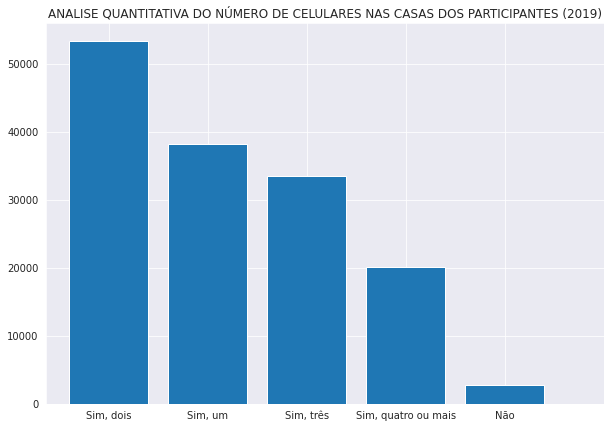

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2019.Q022.value_counts().index, dados_enem_2019.Q022.value_counts().values)
plt.xticks([0,1,2,3,4,5], ["Sim, dois", "Sim, um", "Sim, três", "Sim, quatro ou mais", "Não"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE CELULARES NAS CASAS DOS PARTICIPANTES (2019)')
plt.show()

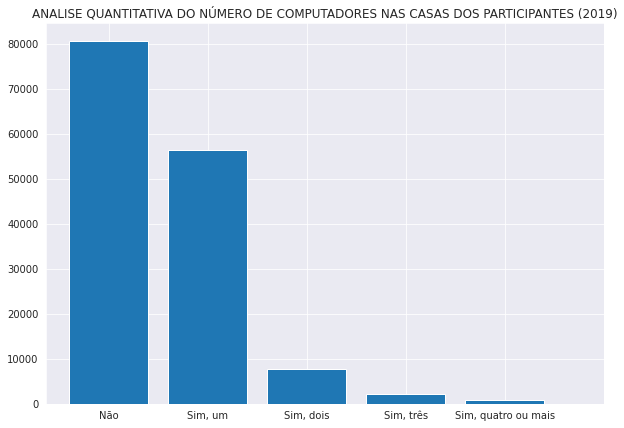

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2019.Q024.value_counts().index, dados_enem_2019.Q024.value_counts().values)
plt.xticks([0,1,2,3,4,5], ["Não", "Sim, um", "Sim, dois", "Sim, três", "Sim, quatro ou mais"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE COMPUTADORES NAS CASAS DOS PARTICIPANTES (2019)')
plt.show()

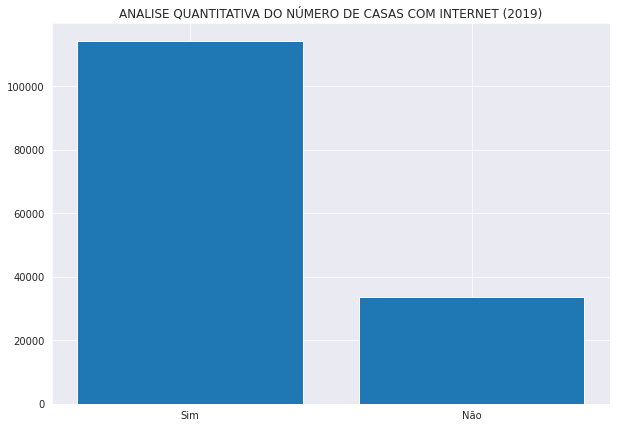

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(dados_enem_2019.Q025.value_counts().index, dados_enem_2019.Q025.value_counts().values)
plt.xticks([0,1], ["Sim", "Não"])
plt.title('ANALISE QUANTITATIVA DO NÚMERO DE CASAS COM INTERNET (2019)')
plt.show()

### Primeiras impressões dos dados de 2019

* O número de residencias com internet caiu ainda mais neste ano, veremos se isso possui influencia nas notas;
* Os dados das notas são bem parecidos com o ano de 2018.

## **ANALISE MAIS APROFUNDADA**

Nesta etapa faremos algumas hipoteses para tentar chegar a algumas teses a partir desses dados. 
São elas:

* A internet na residência do participante faz diferença na nota?
* A escola pública, mesmo com condições piores, se compara com a privada? 
* A escola pública, aliada com a internet, pode competir com a escola privada?



### **A internet na residência do participante faz diferença na nota?**

Para analisarmos está questão precisaremos, primeiramente, dividir os dados em "Com internet" e "Sem internet".

In [ ]:
com_internet_17 = dados_enem_2017.loc[dados_enem_2017.Q025 == "B"]
sem_internet_17 = dados_enem_2017.loc[dados_enem_2017.Q025 == "A"]

com_internet_18 = dados_enem_2018.loc[dados_enem_2018.Q025 == "B"]
sem_internet_18 = dados_enem_2018.loc[dados_enem_2018.Q025 == "A"]

com_internet_19 = dados_enem_2019.loc[dados_enem_2019.Q025 == "B"]
sem_internet_19 = dados_enem_2019.loc[dados_enem_2019.Q025 == "A"]

Vamos analisar agora a porcentagem de cada ano, no quesito ter ou não internet

In [ ]:
print(f"Residências com Internet em 2017: {com_internet_17.shape[0]/dados_enem_2017.shape[0]*100:.1f}%")
print(f"Residências sem Internet em 2017: {sem_internet_17.shape[0]/dados_enem_2017.shape[0]*100:.1f}%")
print()
print(f"Residências com Internet em 2018: {com_internet_18.shape[0]/dados_enem_2018.shape[0]*100:.1f}%")
print(f"Residências sem Internet em 2018: {sem_internet_18.shape[0]/dados_enem_2018.shape[0]*100:.1f}%")
print()
print(f"Residências com Internet em 2018: {com_internet_19.shape[0]/dados_enem_2019.shape[0]*100:.1f}%")
print(f"Residências sem Internet em 2018: {sem_internet_19.shape[0]/dados_enem_2019.shape[0]*100:.1f}%")

Residências com Internet em 2017: 66.3%
Residências sem Internet em 2017: 33.7%

Residências com Internet em 2018: 72.8%
Residências sem Internet em 2018: 27.2%

Residências com Internet em 2018: 77.2%
Residências sem Internet em 2018: 22.8%


Demonstração Gŕafica:


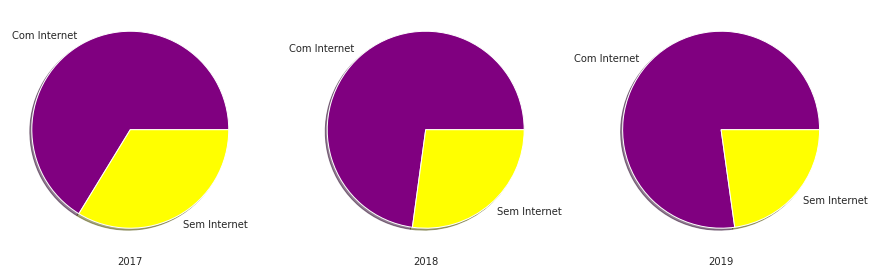

In [ ]:
print("Demonstração Gŕafica:")
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.pie(dados_enem_2017.Q025.value_counts(), labels=["Com Internet","Sem Internet"], colors=["purple", "yellow"], shadow=True)
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.pie(dados_enem_2018.Q025.value_counts(), labels=["Com Internet","Sem Internet"], colors=["purple", "yellow"], shadow=True)
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.pie(dados_enem_2019.Q025.value_counts(), labels=["Com Internet","Sem Internet"], colors=["purple", "yellow"], shadow=True)
plt.xlabel("2019")
plt.show()

Agora que sabemos, atráves dos dados, que o número de residencias com internet aumenta a cada ano. E temos também as porcentagens de cada ano. A partir disso vamos comparar as notas nas duas situaçoes:

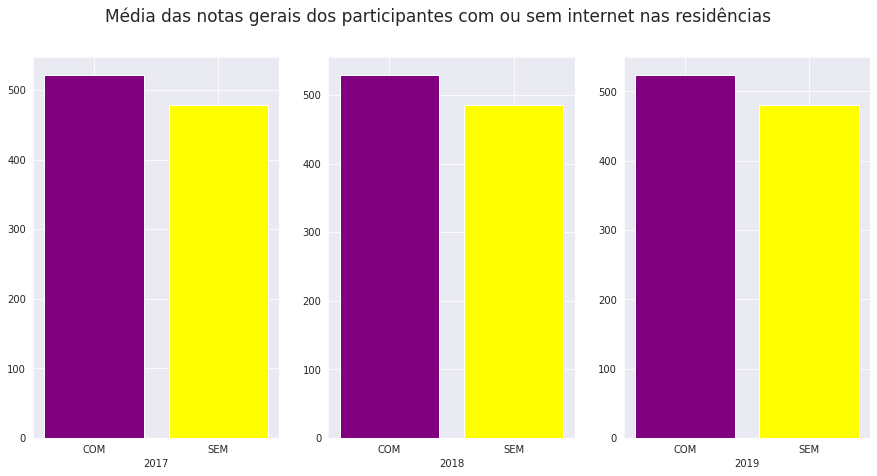

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], com_internet_17.NOTA.mean(), color="purple")
plt.bar([1], sem_internet_17.NOTA.mean(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], com_internet_18.NOTA.mean(), color="purple")
plt.bar([1], sem_internet_18.NOTA.mean(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], com_internet_19.NOTA.mean(), color="purple")
plt.bar([1], sem_internet_19.NOTA.mean(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2019")
plt.suptitle("Média das notas gerais dos participantes com ou sem internet nas residências", size=17)
plt.show()

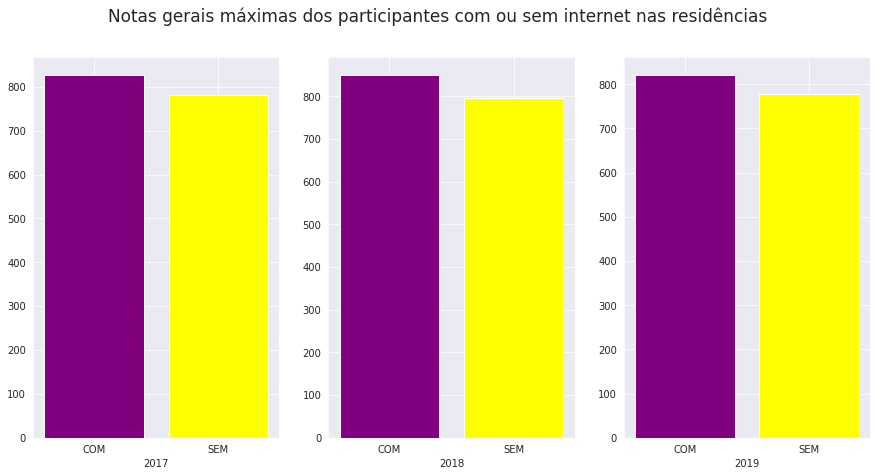

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], com_internet_17.NOTA.max(), color="purple")
plt.bar([1], sem_internet_17.NOTA.max(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], com_internet_18.NOTA.max(), color="purple")
plt.bar([1], sem_internet_18.NOTA.max(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], com_internet_19.NOTA.max(), color="purple")
plt.bar([1], sem_internet_19.NOTA.max(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2019")
plt.suptitle("Notas gerais máximas dos participantes com ou sem internet nas residências", size=17)
plt.show()

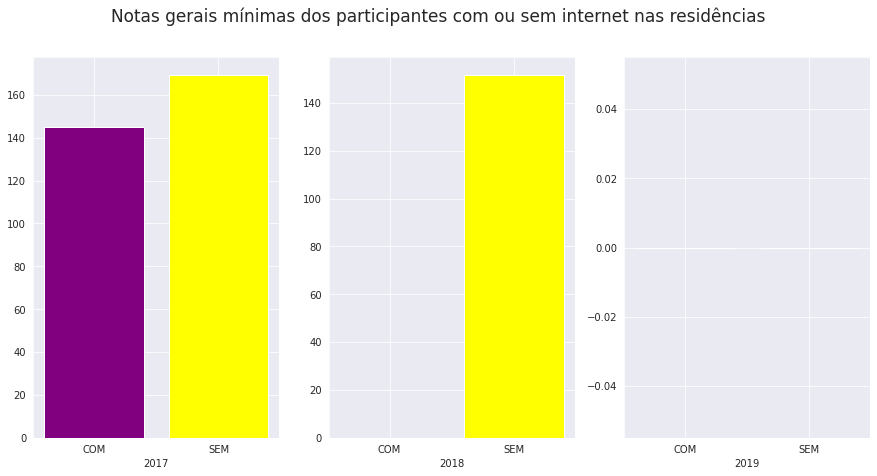

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], com_internet_17.NOTA.min(), color="purple")
plt.bar([1], sem_internet_17.NOTA.min(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], com_internet_18.NOTA.min(), color="purple")
plt.bar([1], sem_internet_18.NOTA.min(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], com_internet_19.NOTA.min(), color="purple")
plt.bar([1], sem_internet_19.NOTA.min(), color="yellow")
plt.xticks([0,1], ["COM", "SEM"])
plt.xlabel("2019")
plt.suptitle("Notas gerais mínimas dos participantes com ou sem internet nas residências", size=17)
plt.show()

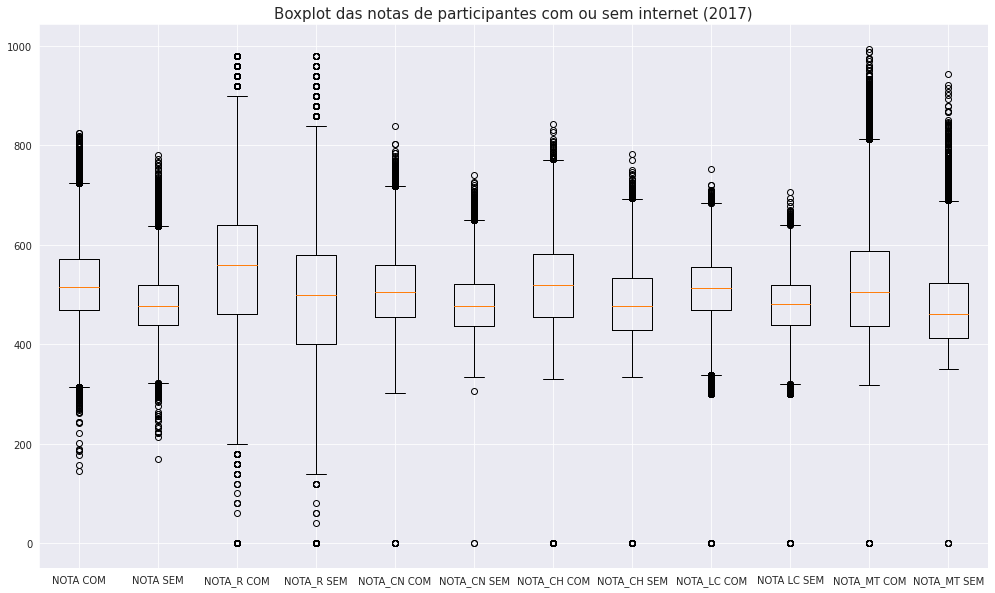

In [ ]:
plt.figure(figsize=(17,10))
plt.boxplot([ com_internet_17.NOTA.dropna(),       sem_internet_17.NOTA.dropna(),
              com_internet_17.NU_NOTA_REDACAO.dropna(), sem_internet_17.NU_NOTA_REDACAO.dropna(), 
              com_internet_17.NU_NOTA_CN.dropna(), sem_internet_17.NU_NOTA_CN.dropna(),
              com_internet_17.NU_NOTA_CH.dropna(),sem_internet_17.NU_NOTA_CH.dropna(),
              com_internet_17.NU_NOTA_LC.dropna(), sem_internet_17.NU_NOTA_LC.dropna(),
              com_internet_17.NU_NOTA_MT.dropna(), sem_internet_17.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA COM', "NOTA SEM", 'NOTA_R COM', "NOTA_R SEM", 'NOTA_CN COM', "NOTA_CN SEM", 
                           'NOTA_CH COM', "NOTA_CH SEM", 'NOTA_LC COM', "NOTA LC SEM", 'NOTA_MT COM', "NOTA_MT SEM"])
plt.title("Boxplot das notas de participantes com ou sem internet (2017)",size=15)
plt.show()

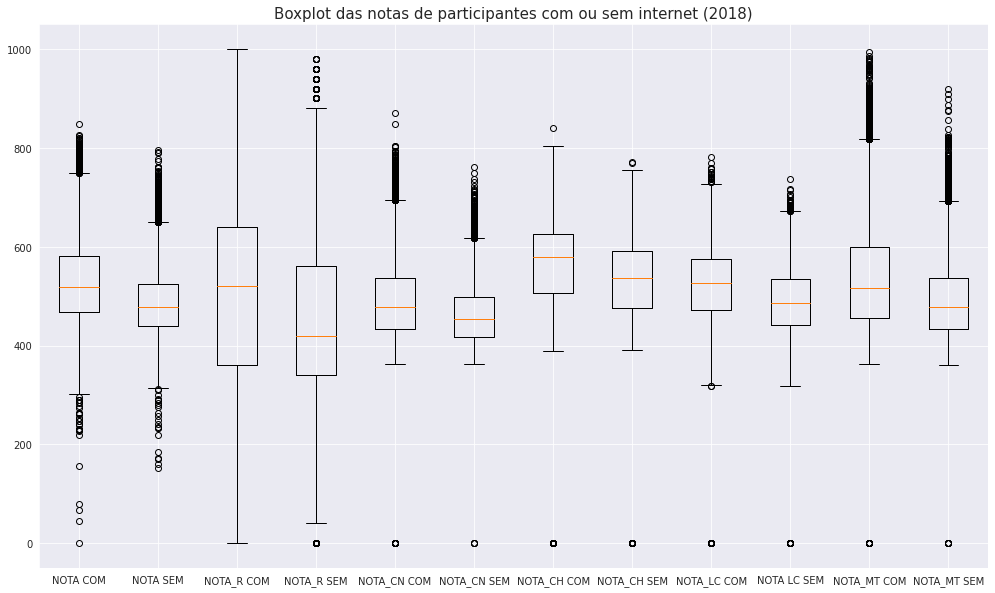

In [ ]:
plt.figure(figsize=(17,10))
plt.boxplot([ com_internet_18.NOTA.dropna(),       sem_internet_18.NOTA.dropna(),
              com_internet_18.NU_NOTA_REDACAO.dropna(), sem_internet_18.NU_NOTA_REDACAO.dropna(), 
              com_internet_18.NU_NOTA_CN.dropna(), sem_internet_18.NU_NOTA_CN.dropna(),
              com_internet_18.NU_NOTA_CH.dropna(),sem_internet_18.NU_NOTA_CH.dropna(),
              com_internet_18.NU_NOTA_LC.dropna(), sem_internet_18.NU_NOTA_LC.dropna(),
              com_internet_18.NU_NOTA_MT.dropna(), sem_internet_18.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA COM', "NOTA SEM", 'NOTA_R COM', "NOTA_R SEM", 'NOTA_CN COM', "NOTA_CN SEM", 
                           'NOTA_CH COM', "NOTA_CH SEM", 'NOTA_LC COM', "NOTA LC SEM", 'NOTA_MT COM', "NOTA_MT SEM"])
plt.title("Boxplot das notas de participantes com ou sem internet (2018)",size=15)
plt.show()

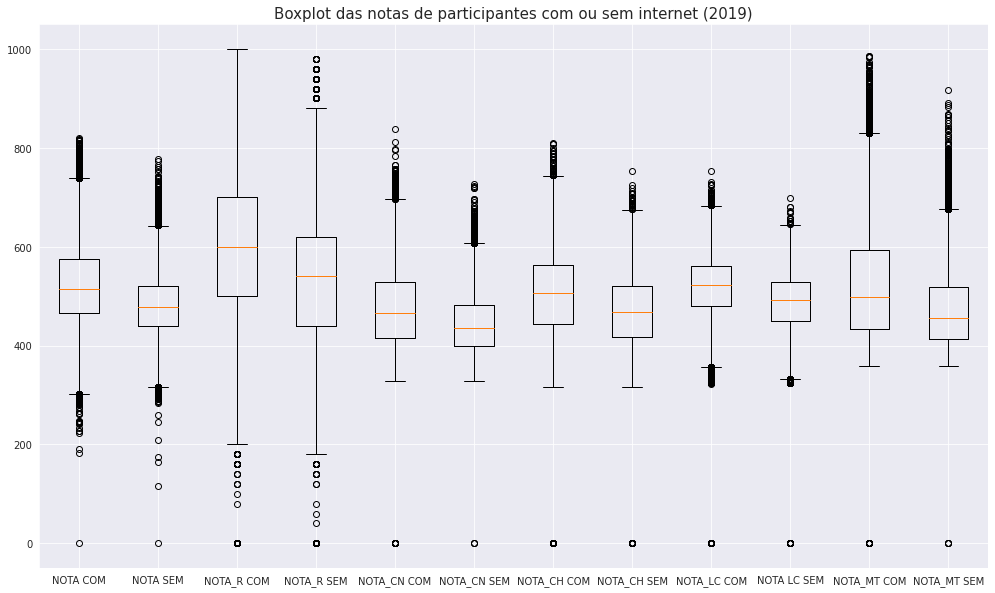

In [ ]:
plt.figure(figsize=(17,10))
plt.boxplot([ com_internet_19.NOTA.dropna(),       sem_internet_19.NOTA.dropna(),
              com_internet_19.NU_NOTA_REDACAO.dropna(), sem_internet_19.NU_NOTA_REDACAO.dropna(), 
              com_internet_19.NU_NOTA_CN.dropna(), sem_internet_19.NU_NOTA_CN.dropna(),
              com_internet_19.NU_NOTA_CH.dropna(),sem_internet_19.NU_NOTA_CH.dropna(),
              com_internet_19.NU_NOTA_LC.dropna(), sem_internet_19.NU_NOTA_LC.dropna(),
              com_internet_19.NU_NOTA_MT.dropna(), sem_internet_19.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA COM', "NOTA SEM", 'NOTA_R COM', "NOTA_R SEM", 'NOTA_CN COM', "NOTA_CN SEM", 
                           'NOTA_CH COM', "NOTA_CH SEM", 'NOTA_LC COM', "NOTA LC SEM", 'NOTA_MT COM', "NOTA_MT SEM"])
plt.title("Boxplot das notas de participantes com ou sem internet (2019)",size=15)
plt.show()

Analisando os boxplots e os gŕaficos de barras é possível perceber os seguintes pontos:
* Ao analisar somente a média e o ponto máximo da nota geral, vamos ver que a internet influencia bastante nas notas, porém se analisarmos o boxplot, veremos que não é simplismente isso.
* A falta de internet na residência é mais nitida ao vermos as provas de ciências da Natureza e de matemática, onde a diferença da nota maxima alcançada é bem grande. Isso pode se dar por N fatores, porém é fato de que matérias de exatas são mais complicadas de estudar pois é necessário uma base teorica forte de diversos temas abordados no Ensino Médio, e sem o auxilio da internet para esse estudo acontecer, se torna ainda mais dificil o desenvolvimento nessas provas;
* Outro ponto importante de se ressaltar é que as notas maximas de Redação em cada um dos lados da comparação é bastante similar (apesar de que os participantes que tiraram notas muito acima e não tem internet em casa são considerados exceções). Isso pode ser possível pelo fato de existirem mais materiais focados apenas na redação do ENEM off-line. Nas próprias escolas ou em cursinhos, a redação é sempre elevada no quesito importância, pois é considerada a maneira mais "fácil" de se aumentar a nota final no Exame Nacional do Ensino Médio.


### **A escola pública, mesmo com condições piores, se compara com a privada?**

OBS: Antes de começar-mos, é necessário ressaltar que o número de participantes que não responderam a questão do tipo de escola nos 3 anos é muito grande. Isso deixará nossa analise mais pobre, mas ainda assim válida. infelizemente são os dados que estão disponíveis.

Vamos, primeiramente, dividir os DataSets em "Escola Pública" e "Escola Privada"


In [ ]:
epub_2017 = dados_enem_2017.loc[dados_enem_2017.TP_ESCOLA == 2] #Escola pública
epri_2017 = dados_enem_2017.loc[dados_enem_2017.TP_ESCOLA == 3] #Escola privada

epub_2018 = dados_enem_2018.loc[dados_enem_2018.TP_ESCOLA == 2] #Escola pública
epri_2018 = dados_enem_2018.loc[dados_enem_2018.TP_ESCOLA == 4] #Escola privada

epub_2019 = dados_enem_2019.loc[dados_enem_2019.TP_ESCOLA == 2] #Escola pública
epri_2019 = dados_enem_2019.loc[dados_enem_2019.TP_ESCOLA == 3] #Escola privada

Vamos analisar as porcentagens de alunos de escolas públicas e privadas:

In [ ]:
print(f"Participantes de Escola Pública em 2017: {(epub_2017.shape[0]/(epub_2017.shape[0]+epri_2017.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Particular em 2017: {(epri_2017.shape[0]/(epub_2017.shape[0]+epri_2017.shape[0]))*100:.1f}%")
print()
print(f"Participantes de Escola Pública em 2018: {(epub_2018.shape[0]/(epub_2018.shape[0]+epri_2018.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Particular em 2018: {(epri_2018.shape[0]/(epub_2018.shape[0]+epri_2018.shape[0]))*100:.1f}%")
print()
print(f"Participantes de Escola Pública em 2019: {(epub_2019.shape[0]/(epub_2019.shape[0]+epri_2019.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Particular em 2019: {(epri_2019.shape[0]/(epub_2019.shape[0]+epri_2019.shape[0]))*100:.1f}%")
print()

Participantes de Escola Pública em 2017: 78.5%
Participantes de Escola Particular em 2017: 21.5%

Participantes de Escola Pública em 2018: 78.6%
Participantes de Escola Particular em 2018: 21.4%

Participantes de Escola Pública em 2019: 83.4%
Participantes de Escola Particular em 2019: 16.6%



Demonstração Gŕafica:


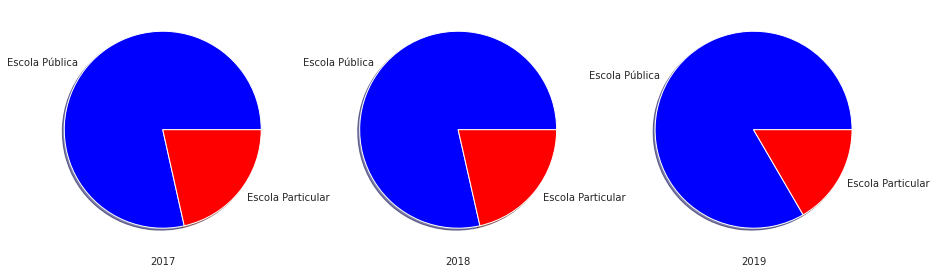

In [ ]:
print("Demonstração Gŕafica:")
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.pie([epub_2017.shape[0],epri_2017.shape[0]], colors=["blue", "red"], shadow=True, labels=["Escola Pública","Escola Particular"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.pie([epub_2018.shape[0],epri_2018.shape[0]], colors=["blue", "red"], shadow=True, labels=["Escola Pública","Escola Particular"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.pie([epub_2019.shape[0],epri_2019.shape[0]], colors=["blue", "red"], shadow=True, labels=["Escola Pública","Escola Particular"])
plt.xlabel("2019")
plt.show()

Percebe-se que a distribuição dos números, ao longo dos anos, é bastante constante. Com a Escola pública sendo a maioria e a privada a minoria. Vamos analisar as notas a partir desses parametros agora.

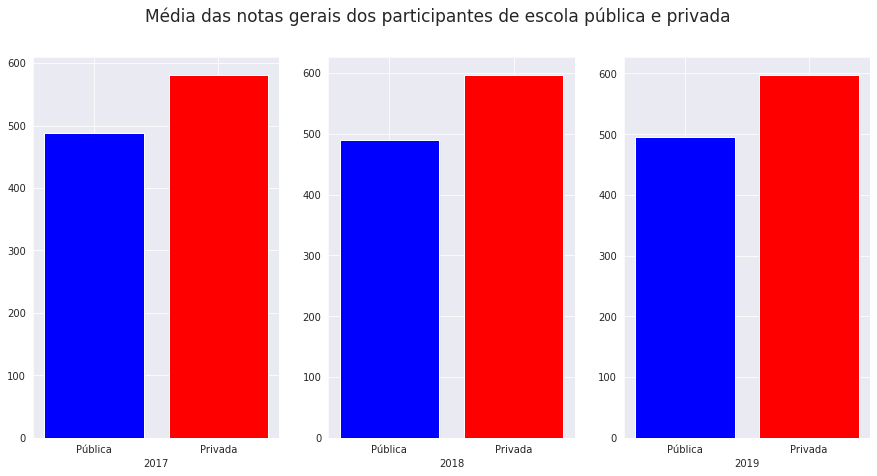

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], epub_2017.NOTA.mean(), color="blue")
plt.bar([1], epri_2017.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], epub_2018.NOTA.mean(), color="blue")
plt.bar([1], epri_2018.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], epub_2019.NOTA.mean(), color="blue")
plt.bar([1], epri_2019.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2019")
plt.suptitle("Média das notas gerais dos participantes de escola pública e privada", size=17)
plt.show()

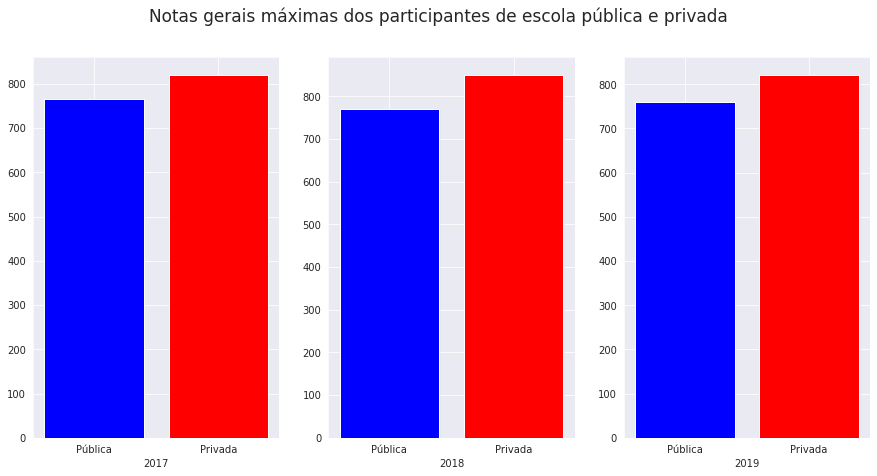

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], epub_2017.NOTA.max(), color="blue")
plt.bar([1], epri_2017.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], epub_2018.NOTA.max(), color="blue")
plt.bar([1], epri_2018.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], epub_2019.NOTA.max(), color="blue")
plt.bar([1], epri_2019.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2019")
plt.suptitle("Notas gerais máximas dos participantes de escola pública e privada", size=17)
plt.show()

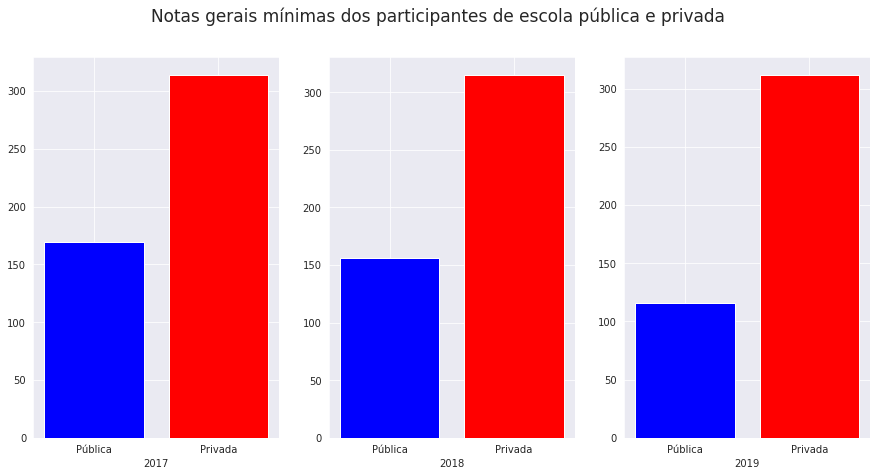

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], epub_2017.NOTA.min(), color="blue")
plt.bar([1], epri_2017.NOTA.min(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], epub_2018.NOTA.min(), color="blue")
plt.bar([1], epri_2018.NOTA.min(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], epub_2019.NOTA.min(), color="blue")
plt.bar([1], epri_2019.NOTA.min(), color="red")
plt.xticks([0,1], ["Pública", "Privada"])
plt.xlabel("2019")
plt.suptitle("Notas gerais mínimas dos participantes de escola pública e privada", size=17)
plt.show()

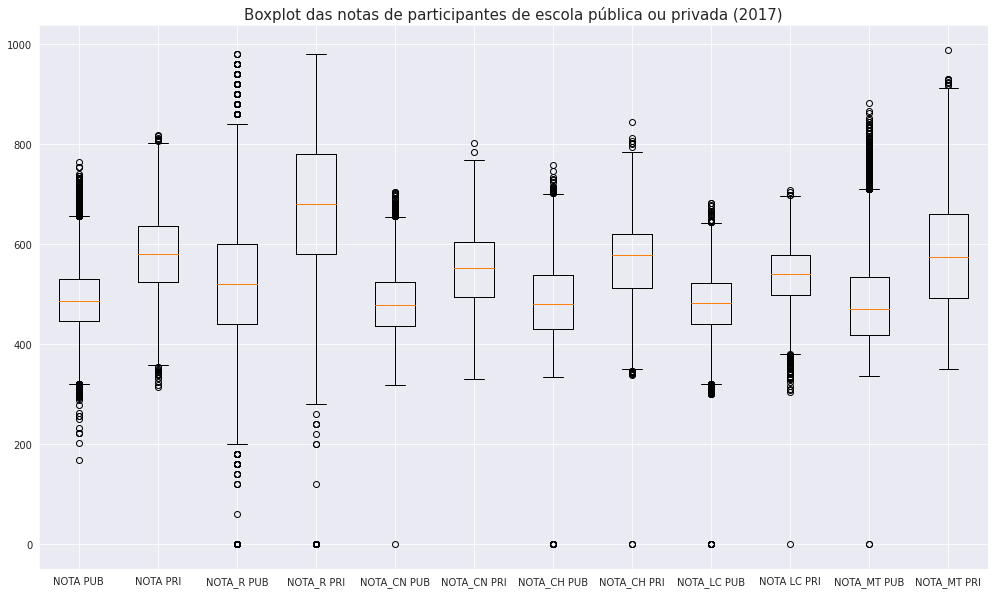

In [ ]:
plt.figure(figsize=(17,10))
plt.boxplot([ epub_2017.NOTA.dropna(),       epri_2017.NOTA.dropna(),
              epub_2017.NU_NOTA_REDACAO.dropna(), epri_2017.NU_NOTA_REDACAO.dropna(), 
              epub_2017.NU_NOTA_CN.dropna(), epri_2017.NU_NOTA_CN.dropna(),
              epub_2017.NU_NOTA_CH.dropna(),epri_2017.NU_NOTA_CH.dropna(),
              epub_2017.NU_NOTA_LC.dropna(), epri_2017.NU_NOTA_LC.dropna(),
              epub_2017.NU_NOTA_MT.dropna(), epri_2017.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB', "NOTA PRI", 'NOTA_R PUB', "NOTA_R PRI", 'NOTA_CN PUB', "NOTA_CN PRI", 
                           'NOTA_CH PUB', "NOTA_CH PRI", 'NOTA_LC PUB', "NOTA LC PRI", 'NOTA_MT PUB', "NOTA_MT PRI"])
plt.title("Boxplot das notas de participantes de escola pública ou privada (2017)",size=15)
plt.show()

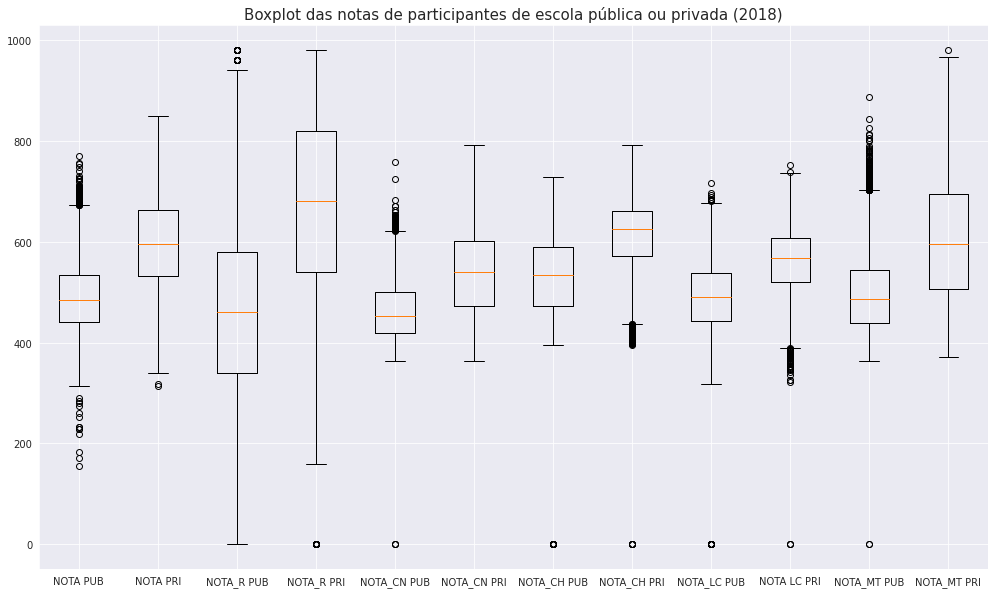

In [ ]:
plt.figure(figsize=(17,10))
plt.boxplot([ epub_2018.NOTA.dropna(),       epri_2018.NOTA.dropna(),
              epub_2018.NU_NOTA_REDACAO.dropna(), epri_2018.NU_NOTA_REDACAO.dropna(), 
              epub_2018.NU_NOTA_CN.dropna(), epri_2018.NU_NOTA_CN.dropna(),
              epub_2018.NU_NOTA_CH.dropna(),epri_2018.NU_NOTA_CH.dropna(),
              epub_2018.NU_NOTA_LC.dropna(), epri_2018.NU_NOTA_LC.dropna(),
              epub_2018.NU_NOTA_MT.dropna(), epri_2018.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB', "NOTA PRI", 'NOTA_R PUB', "NOTA_R PRI", 'NOTA_CN PUB', "NOTA_CN PRI", 
                           'NOTA_CH PUB', "NOTA_CH PRI", 'NOTA_LC PUB', "NOTA LC PRI", 'NOTA_MT PUB', "NOTA_MT PRI"])
plt.title("Boxplot das notas de participantes de escola pública ou privada (2018)",size=15)
plt.show()

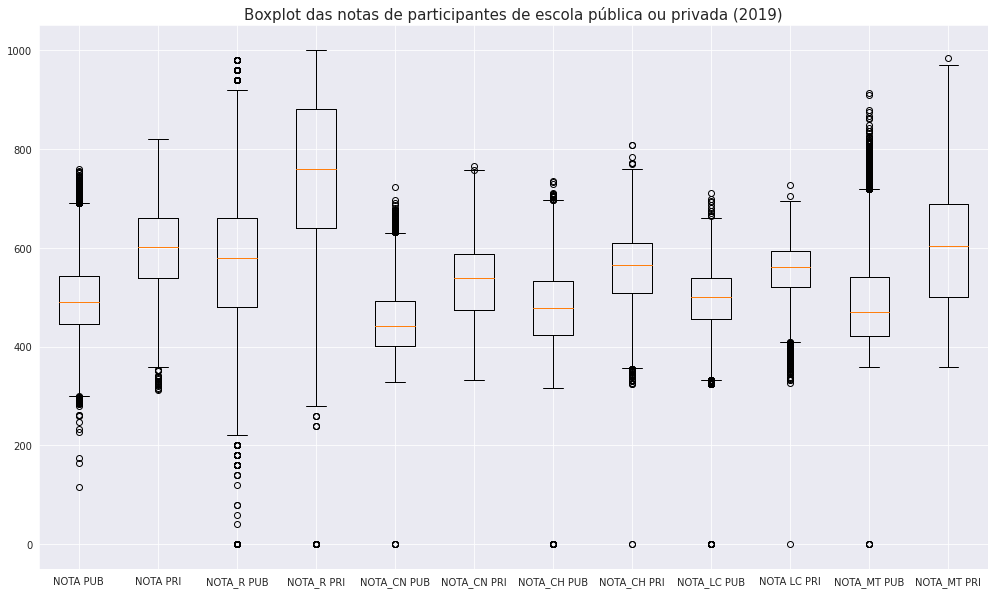

In [ ]:
plt.figure(figsize=(17,10))
plt.boxplot([ epub_2019.NOTA.dropna(),       epri_2019.NOTA.dropna(),
              epub_2019.NU_NOTA_REDACAO.dropna(), epri_2019.NU_NOTA_REDACAO.dropna(), 
              epub_2019.NU_NOTA_CN.dropna(), epri_2019.NU_NOTA_CN.dropna(),
              epub_2019.NU_NOTA_CH.dropna(),epri_2019.NU_NOTA_CH.dropna(),
              epub_2019.NU_NOTA_LC.dropna(), epri_2019.NU_NOTA_LC.dropna(),
              epub_2019.NU_NOTA_MT.dropna(), epri_2019.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB', "NOTA PRI", 'NOTA_R PUB', "NOTA_R PRI", 'NOTA_CN PUB', "NOTA_CN PRI", 
                           'NOTA_CH PUB', "NOTA_CH PRI", 'NOTA_LC PUB', "NOTA LC PRI", 'NOTA_MT PUB', "NOTA_MT PRI"])
plt.title("Boxplot das notas de participantes de escola pública ou privada (2019)",size=15)
plt.show()

Concluimos os seguintes pontos através dessa análise:

* É nítido a superioridade das notas das escolas particulares em todas as provas;
* Apesar de terem excessões (os "outliers" positivos), em geral se analisarmos os quartis, as notas das escolas particulares são bastante superiores.

## **A escola pública com Internet x A escola particular sem Internet**

Para isso vamos checar as porcentagens dos participantes de escola pública e particular, com ou sem internet:

In [ ]:
epub_2017_COM = epub_2017.loc[epub_2017.Q025 == "B"] #Escola pública com internet em 2017
epub_2017_SEM = epub_2017.loc[epub_2017.Q025 == "A"] #Escola pública sem internet em 2017
epri_2017_COM = epri_2017.loc[epri_2017.Q025 == "B"] #Escola privada com internet em 2017 
epri_2017_SEM = epri_2017.loc[epri_2017.Q025 == "A"] #Escola privada sem internet em 2017

epub_2018_COM = epub_2018.loc[epub_2018.Q025 == "B"] #Escola pública com internet em 2018
epub_2018_SEM = epub_2018.loc[epub_2018.Q025 == "A"] #Escola pública sem internet em 2018
epri_2018_COM = epri_2018.loc[epri_2018.Q025 == "B"] #Escola privada com internet em 2018 
epri_2018_SEM = epri_2018.loc[epri_2018.Q025 == "A"] #Escola privada sem internet em 2018

epub_2019_COM = epub_2019.loc[epub_2019.Q025 == "B"] #Escola pública com internet em 2019
epub_2019_SEM = epub_2019.loc[epub_2019.Q025 == "A"] #Escola pública sem internet em 2019
epri_2019_COM = epri_2019.loc[epri_2019.Q025 == "B"] #Escola privada com internet em 2019 
epri_2019_SEM = epri_2019.loc[epri_2019.Q025 == "A"] #Escola privada sem internet em 2019

In [ ]:
print(f"Participantes de Escola Pública com internet em 2017: {(epub_2017_COM.shape[0]/(epub_2017.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Pública sem internet em 2017: {(epub_2017_SEM.shape[0]/(epub_2017.shape[0]))*100:.1f}%")
print()
print(f"Participantes de Escola Particular com internet em 2017: {(epri_2017_COM.shape[0]/(epri_2017.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Particular sem internet em 2017: {(epri_2017_SEM.shape[0]/(epri_2017.shape[0]))*100:.1f}%")
print()
print(f"Participantes de Escola Pública com internet em 2018: {(epub_2018_COM.shape[0]/(epub_2018.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Pública sem internet em 2018: {(epub_2018_SEM.shape[0]/(epub_2018.shape[0]))*100:.1f}%")
print()
print(f"Participantes de Escola Particular com internet em 2018: {(epri_2018_COM.shape[0]/(epri_2018.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Particular sem internet em 2018: {(epri_2018_SEM.shape[0]/(epri_2018.shape[0]))*100:.1f}%")
print()
print(f"Participantes de Escola Pública com internet em 2019: {(epub_2019_COM.shape[0]/(epub_2019.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Pública sem internet em 2019: {(epub_2019_SEM.shape[0]/(epub_2019.shape[0]))*100:.1f}%")
print()
print(f"Participantes de Escola Particular com internet em 2019: {(epri_2019_COM.shape[0]/(epri_2019.shape[0]))*100:.1f}%")
print(f"Participantes de Escola Particular sem internet em 2019: {(epri_2019_SEM.shape[0]/(epri_2019.shape[0]))*100:.1f}%")
print()

Participantes de Escola Pública com internet em 2017: 57.1%
Participantes de Escola Pública sem internet em 2017: 42.9%

Participantes de Escola Particular com internet em 2017: 90.4%
Participantes de Escola Particular sem internet em 2017: 9.6%

Participantes de Escola Pública com internet em 2018: 60.7%
Participantes de Escola Pública sem internet em 2018: 39.3%

Participantes de Escola Particular com internet em 2018: 94.3%
Participantes de Escola Particular sem internet em 2018: 5.7%

Participantes de Escola Pública com internet em 2019: 69.3%
Participantes de Escola Pública sem internet em 2019: 30.7%

Participantes de Escola Particular com internet em 2019: 95.8%
Participantes de Escola Particular sem internet em 2019: 4.2%



Demonstração Gŕafica:


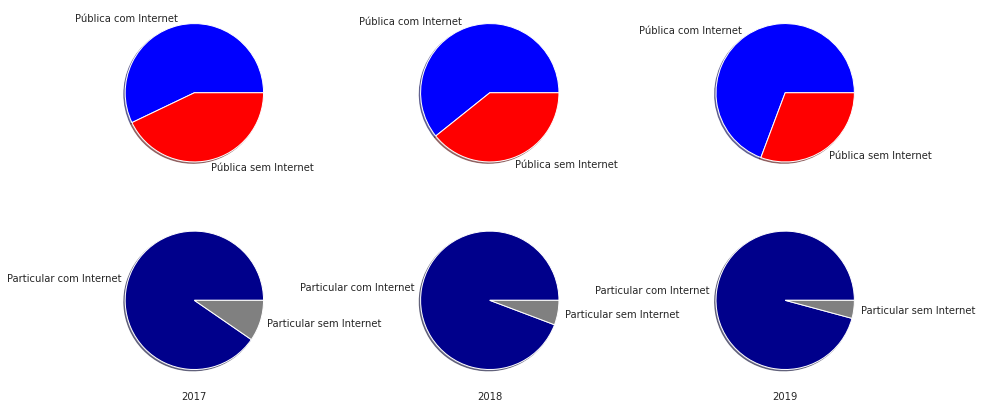

In [ ]:
print("Demonstração Gŕafica:")
plt.figure(figsize=(15,7))
plt.subplot(2, 3, 1)
plt.pie([epub_2017_COM.shape[0],epub_2017_SEM.shape[0]], colors=["blue", "red"], shadow=True, labels=["Pública com Internet","Pública sem Internet"])
plt.subplot(2, 3, 2)
plt.pie([epub_2018_COM.shape[0],epub_2018_SEM.shape[0]], colors=["blue", "red"], shadow=True, labels=["Pública com Internet ","Pública sem Internet"])
plt.subplot(2, 3, 3)
plt.pie([epub_2019_COM.shape[0],epub_2019_SEM.shape[0]], colors=["blue", "red"], shadow=True, labels=["Pública com Internet","Pública sem Internet"])
plt.subplot(2, 3, 4)
plt.pie([epri_2017_COM.shape[0],epri_2017_SEM.shape[0]], colors=["darkblue", "gray"], shadow=True, labels=["Particular com Internet","Particular sem Internet"])
plt.xlabel("2017")
plt.subplot(2, 3, 5)
plt.pie([epri_2018_COM.shape[0],epri_2018_SEM.shape[0]], colors=["darkblue", "gray"], shadow=True, labels=["Particular com Internet","Particular sem Internet"])
plt.xlabel("2018")
plt.subplot(2, 3, 6)
plt.pie([epri_2019_COM.shape[0],epri_2019_SEM.shape[0]], colors=["darkblue", "gray"], shadow=True, labels=["Particular com Internet","Particular sem Internet"])
plt.xlabel("2019")
plt.show()


Vimos a diferença gritante das residencias com internet nas escolas particulares para as públicas. Porém esse não será nosso foco de análise.

Agora vamos analisar as notas a partir das seguintes circunstancias:

* Escola Pública com internet x Escola Particular sem internet
* Escola Pública sem internet x Escola Particular sem internet

### Escola Pública com Internet x Escola Particular sem Internet

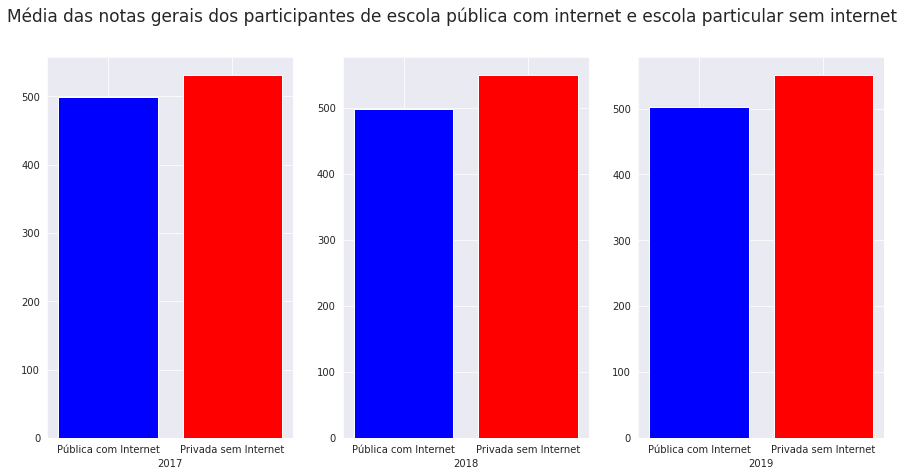

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], epub_2017_COM.NOTA.mean(), color="blue")
plt.bar([1], epri_2017_SEM.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública com Internet", "Privada sem Internet"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], epub_2018_COM.NOTA.mean(), color="blue")
plt.bar([1], epri_2018_SEM.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública com Internet", "Privada sem Internet"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], epub_2019_COM.NOTA.mean(), color="blue")
plt.bar([1], epri_2019_SEM.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública com Internet", "Privada sem Internet"])
plt.xlabel("2019")
plt.suptitle("Média das notas gerais dos participantes de escola pública com internet e escola particular sem internet", size=17)
plt.show()

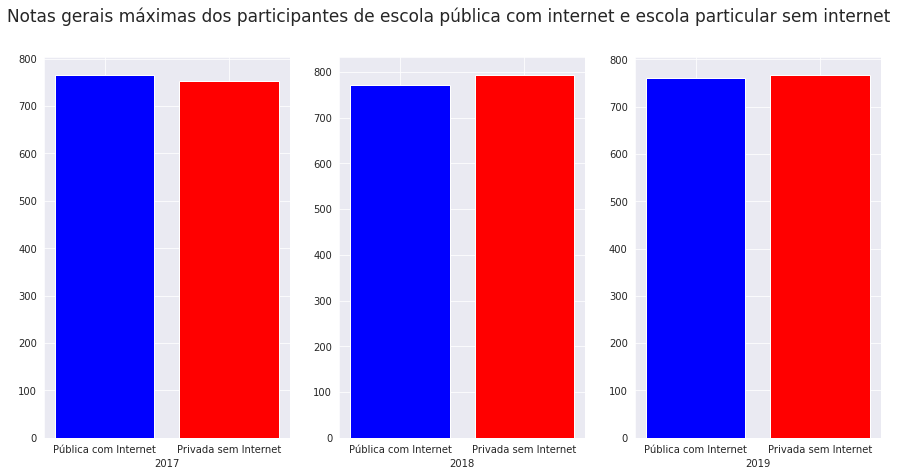

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], epub_2017_COM.NOTA.max(), color="blue")
plt.bar([1], epri_2017_SEM.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública com Internet", "Privada sem Internet"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], epub_2018_COM.NOTA.max(), color="blue")
plt.bar([1], epri_2018_SEM.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública com Internet", "Privada sem Internet"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], epub_2019_COM.NOTA.max(), color="blue")
plt.bar([1], epri_2019_SEM.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública com Internet", "Privada sem Internet"])
plt.xlabel("2019")
plt.suptitle("Notas gerais máximas dos participantes de escola pública com internet e escola particular sem internet", size=17)
plt.show()

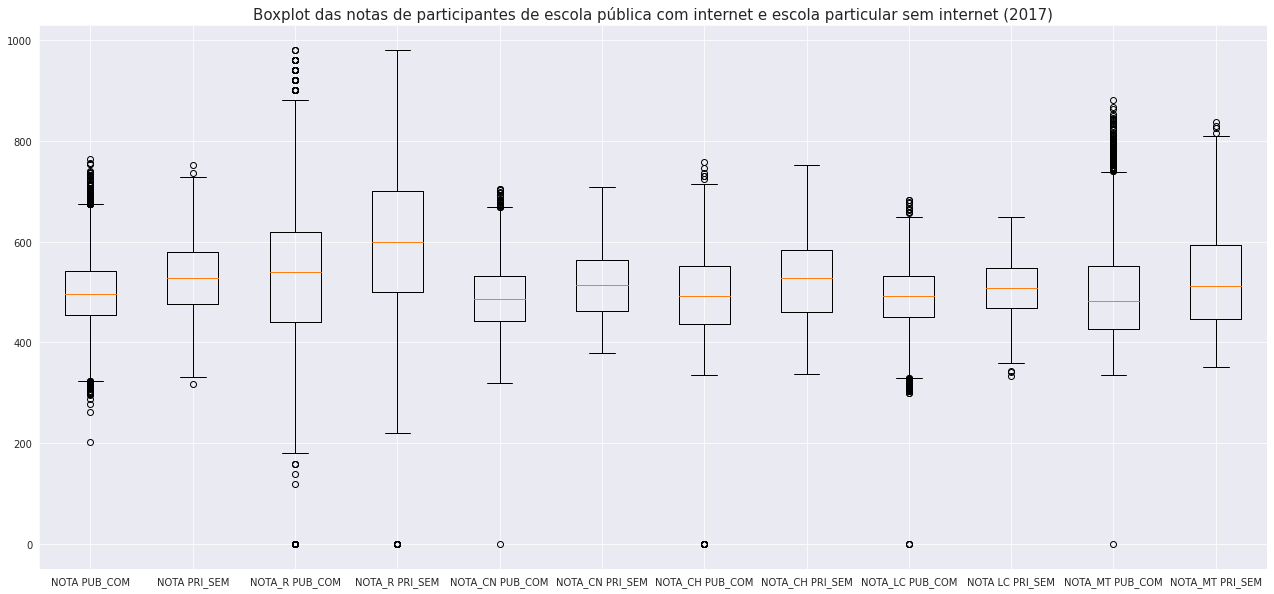

In [ ]:
plt.figure(figsize=(22,10))
plt.boxplot([ epub_2017_COM.NOTA.dropna(),       epri_2017_SEM.NOTA.dropna(),
              epub_2017_COM.NU_NOTA_REDACAO.dropna(), epri_2017_SEM.NU_NOTA_REDACAO.dropna(), 
              epub_2017_COM.NU_NOTA_CN.dropna(), epri_2017_SEM.NU_NOTA_CN.dropna(),
              epub_2017_COM.NU_NOTA_CH.dropna(),epri_2017_SEM.NU_NOTA_CH.dropna(),
              epub_2017_COM.NU_NOTA_LC.dropna(), epri_2017_SEM.NU_NOTA_LC.dropna(),
              epub_2017_COM.NU_NOTA_MT.dropna(), epri_2017_SEM.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB_COM', "NOTA PRI_SEM", 'NOTA_R PUB_COM', "NOTA_R PRI_SEM", 'NOTA_CN PUB_COM', "NOTA_CN PRI_SEM", 
                           'NOTA_CH PUB_COM', "NOTA_CH PRI_SEM", 'NOTA_LC PUB_COM', "NOTA LC PRI_SEM", 'NOTA_MT PUB_COM', "NOTA_MT PRI_SEM"])
plt.title("Boxplot das notas de participantes de escola pública com internet e escola particular sem internet (2017)",size=15)
plt.show()

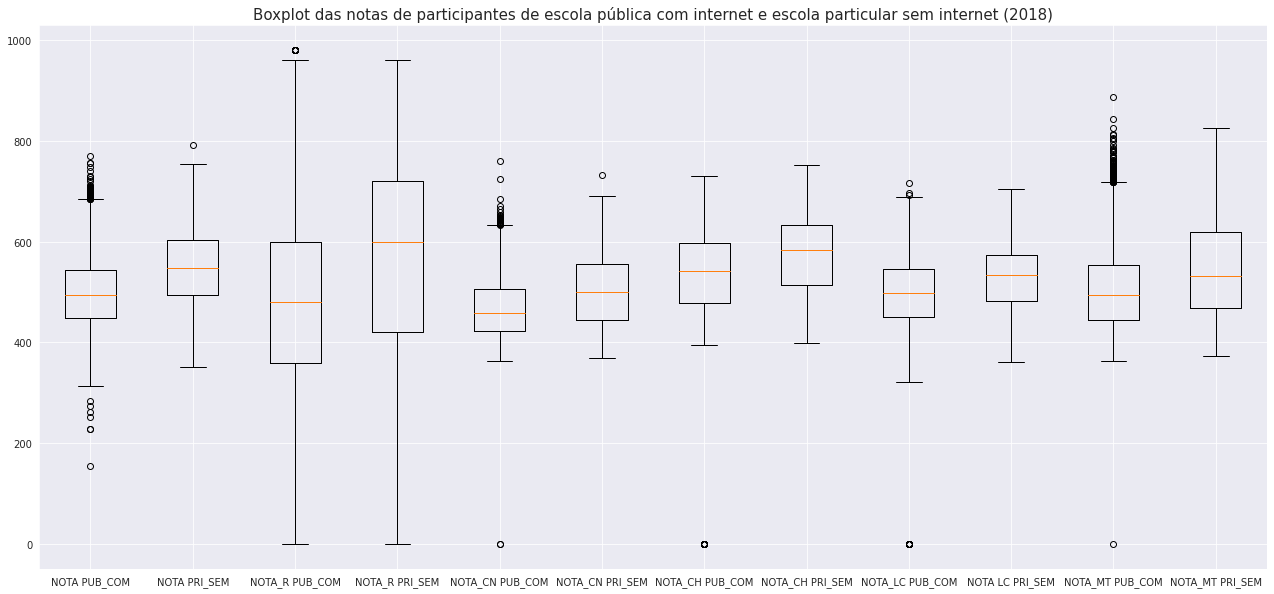

In [ ]:
plt.figure(figsize=(22,10))
plt.boxplot([ epub_2018_COM.NOTA.dropna(),       epri_2018_SEM.NOTA.dropna(),
              epub_2018_COM.NU_NOTA_REDACAO.dropna(), epri_2018_SEM.NU_NOTA_REDACAO.dropna(), 
              epub_2018_COM.NU_NOTA_CN.dropna(), epri_2018_SEM.NU_NOTA_CN.dropna(),
              epub_2018_COM.NU_NOTA_CH.dropna(), epri_2018_SEM.NU_NOTA_CH.dropna(),
              epub_2018_COM.NU_NOTA_LC.dropna(), epri_2018_SEM.NU_NOTA_LC.dropna(),
              epub_2018_COM.NU_NOTA_MT.dropna(), epri_2018_SEM.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB_COM', "NOTA PRI_SEM", 'NOTA_R PUB_COM', "NOTA_R PRI_SEM", 'NOTA_CN PUB_COM', "NOTA_CN PRI_SEM", 
                           'NOTA_CH PUB_COM', "NOTA_CH PRI_SEM", 'NOTA_LC PUB_COM', "NOTA LC PRI_SEM", 'NOTA_MT PUB_COM', "NOTA_MT PRI_SEM"])
plt.title("Boxplot das notas de participantes de escola pública com internet e escola particular sem internet (2018)",size=15)
plt.show()

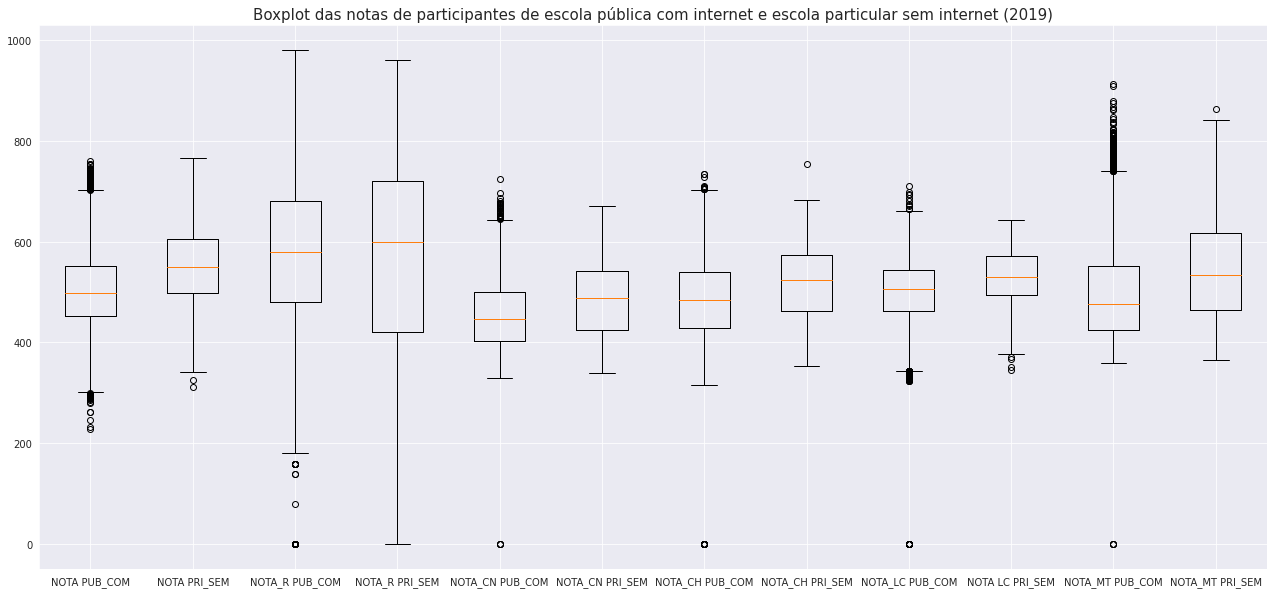

In [ ]:
plt.figure(figsize=(22,10))
plt.boxplot([ epub_2019_COM.NOTA.dropna(),       epri_2019_SEM.NOTA.dropna(),
              epub_2019_COM.NU_NOTA_REDACAO.dropna(), epri_2018_SEM.NU_NOTA_REDACAO.dropna(), 
              epub_2019_COM.NU_NOTA_CN.dropna(), epri_2019_SEM.NU_NOTA_CN.dropna(),
              epub_2019_COM.NU_NOTA_CH.dropna(), epri_2019_SEM.NU_NOTA_CH.dropna(),
              epub_2019_COM.NU_NOTA_LC.dropna(), epri_2019_SEM.NU_NOTA_LC.dropna(),
              epub_2019_COM.NU_NOTA_MT.dropna(), epri_2019_SEM.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB_COM', "NOTA PRI_SEM", 'NOTA_R PUB_COM', "NOTA_R PRI_SEM", 'NOTA_CN PUB_COM', "NOTA_CN PRI_SEM", 
                           'NOTA_CH PUB_COM', "NOTA_CH PRI_SEM", 'NOTA_LC PUB_COM', "NOTA LC PRI_SEM", 'NOTA_MT PUB_COM', "NOTA_MT PRI_SEM"])
plt.title("Boxplot das notas de participantes de escola pública com internet e escola particular sem internet (2019)",size=15)
plt.show()

### Escola Pública sem Internet x Escola Particular sem Internet

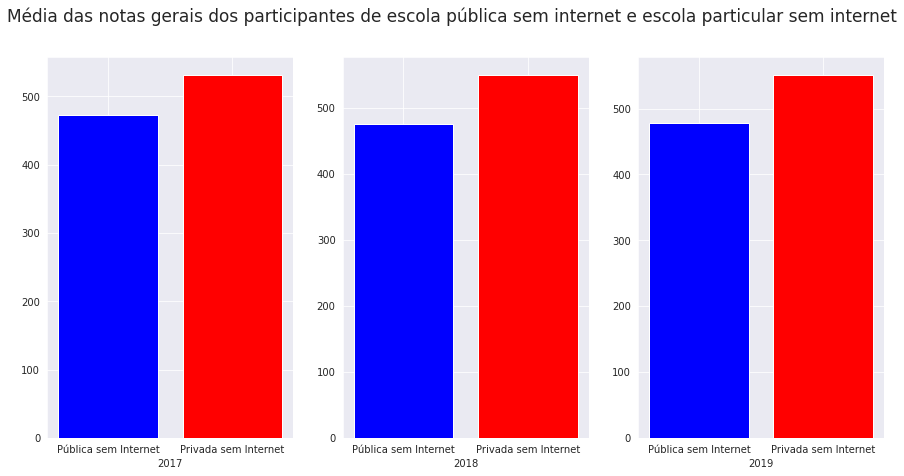

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], epub_2017_SEM.NOTA.mean(), color="blue")
plt.bar([1], epri_2017_SEM.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública sem Internet", "Privada sem Internet"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], epub_2018_SEM.NOTA.mean(), color="blue")
plt.bar([1], epri_2018_SEM.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública sem Internet", "Privada sem Internet"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], epub_2019_SEM.NOTA.mean(), color="blue")
plt.bar([1], epri_2019_SEM.NOTA.mean(), color="red")
plt.xticks([0,1], ["Pública sem Internet", "Privada sem Internet"])
plt.xlabel("2019")
plt.suptitle("Média das notas gerais dos participantes de escola pública sem internet e escola particular sem internet", size=17)
plt.show()

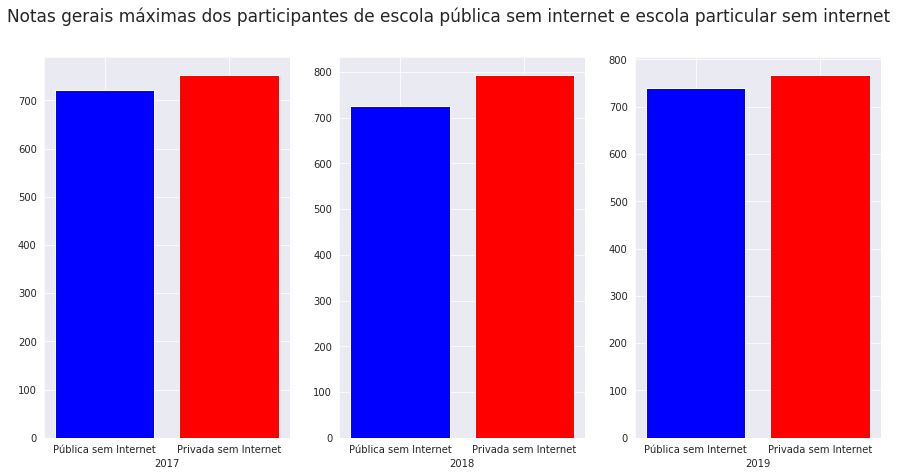

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.bar([0], epub_2017_SEM.NOTA.max(), color="blue")
plt.bar([1], epri_2017_SEM.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública sem Internet", "Privada sem Internet"])
plt.xlabel("2017")
plt.subplot(1, 3, 2)
plt.bar([0], epub_2018_SEM.NOTA.max(), color="blue")
plt.bar([1], epri_2018_SEM.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública sem Internet", "Privada sem Internet"])
plt.xlabel("2018")
plt.subplot(1, 3, 3)
plt.bar([0], epub_2019_SEM.NOTA.max(), color="blue")
plt.bar([1], epri_2019_SEM.NOTA.max(), color="red")
plt.xticks([0,1], ["Pública sem Internet", "Privada sem Internet"])
plt.xlabel("2019")
plt.suptitle("Notas gerais máximas dos participantes de escola pública sem internet e escola particular sem internet", size=17)
plt.show()

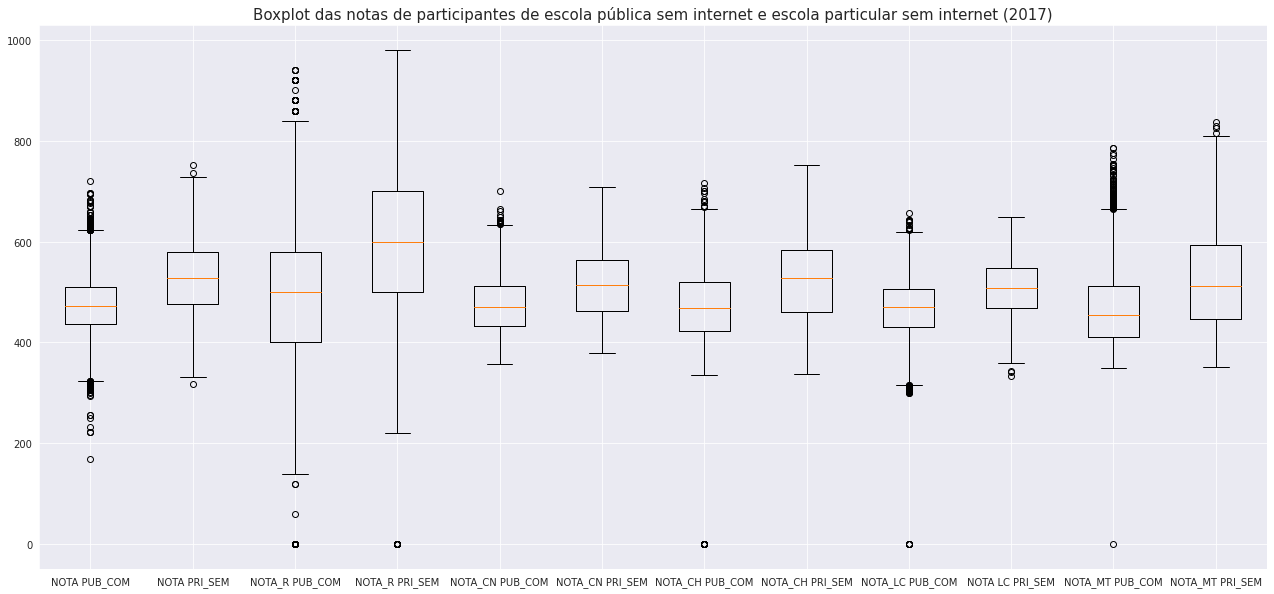

In [ ]:
plt.figure(figsize=(22,10))
plt.boxplot([ epub_2017_SEM.NOTA.dropna(),       epri_2017_SEM.NOTA.dropna(),
              epub_2017_SEM.NU_NOTA_REDACAO.dropna(), epri_2017_SEM.NU_NOTA_REDACAO.dropna(), 
              epub_2017_SEM.NU_NOTA_CN.dropna(), epri_2017_SEM.NU_NOTA_CN.dropna(),
              epub_2017_SEM.NU_NOTA_CH.dropna(),epri_2017_SEM.NU_NOTA_CH.dropna(),
              epub_2017_SEM.NU_NOTA_LC.dropna(), epri_2017_SEM.NU_NOTA_LC.dropna(),
              epub_2017_SEM.NU_NOTA_MT.dropna(), epri_2017_SEM.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB_COM', "NOTA PRI_SEM", 'NOTA_R PUB_COM', "NOTA_R PRI_SEM", 'NOTA_CN PUB_COM', "NOTA_CN PRI_SEM", 
                           'NOTA_CH PUB_COM', "NOTA_CH PRI_SEM", 'NOTA_LC PUB_COM', "NOTA LC PRI_SEM", 'NOTA_MT PUB_COM', "NOTA_MT PRI_SEM"])
plt.title("Boxplot das notas de participantes de escola pública sem internet e escola particular sem internet (2017)",size=15)
plt.show()

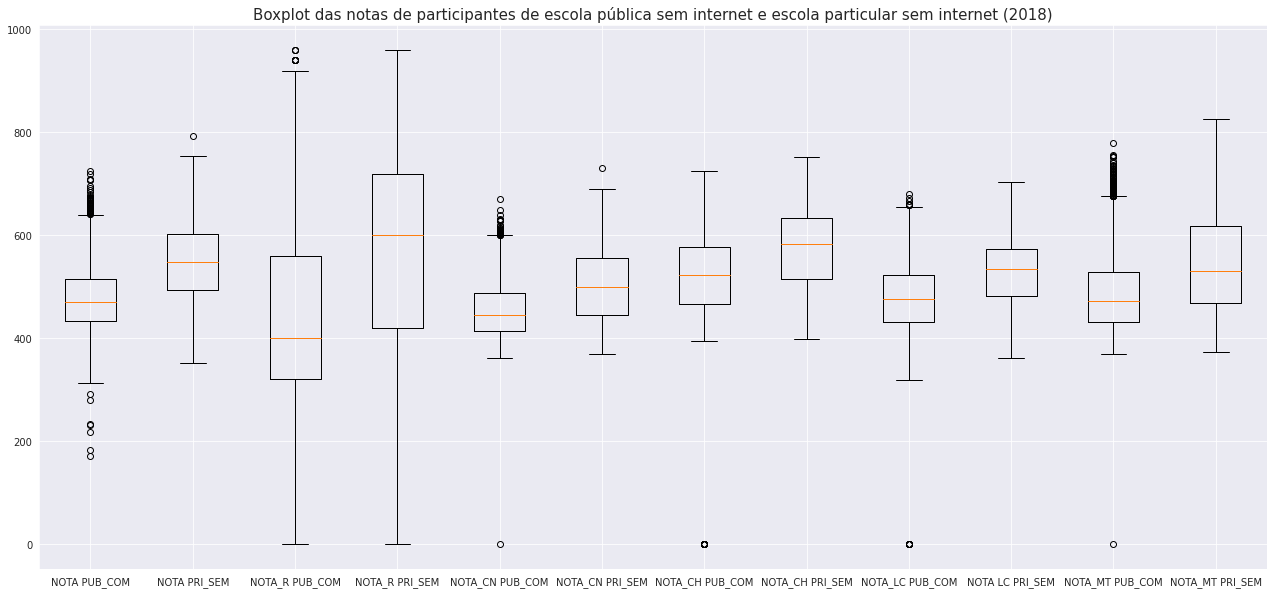

In [ ]:
plt.figure(figsize=(22,10))
plt.boxplot([ epub_2018_SEM.NOTA.dropna(),       epri_2018_SEM.NOTA.dropna(),
              epub_2018_SEM.NU_NOTA_REDACAO.dropna(), epri_2018_SEM.NU_NOTA_REDACAO.dropna(), 
              epub_2018_SEM.NU_NOTA_CN.dropna(), epri_2018_SEM.NU_NOTA_CN.dropna(),
              epub_2018_SEM.NU_NOTA_CH.dropna(), epri_2018_SEM.NU_NOTA_CH.dropna(),
              epub_2018_SEM.NU_NOTA_LC.dropna(), epri_2018_SEM.NU_NOTA_LC.dropna(),
              epub_2018_SEM.NU_NOTA_MT.dropna(), epri_2018_SEM.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB_COM', "NOTA PRI_SEM", 'NOTA_R PUB_COM', "NOTA_R PRI_SEM", 'NOTA_CN PUB_COM', "NOTA_CN PRI_SEM", 
                           'NOTA_CH PUB_COM', "NOTA_CH PRI_SEM", 'NOTA_LC PUB_COM', "NOTA LC PRI_SEM", 'NOTA_MT PUB_COM', "NOTA_MT PRI_SEM"])
plt.title("Boxplot das notas de participantes de escola pública sem internet e escola particular sem internet (2018)",size=15)
plt.show()

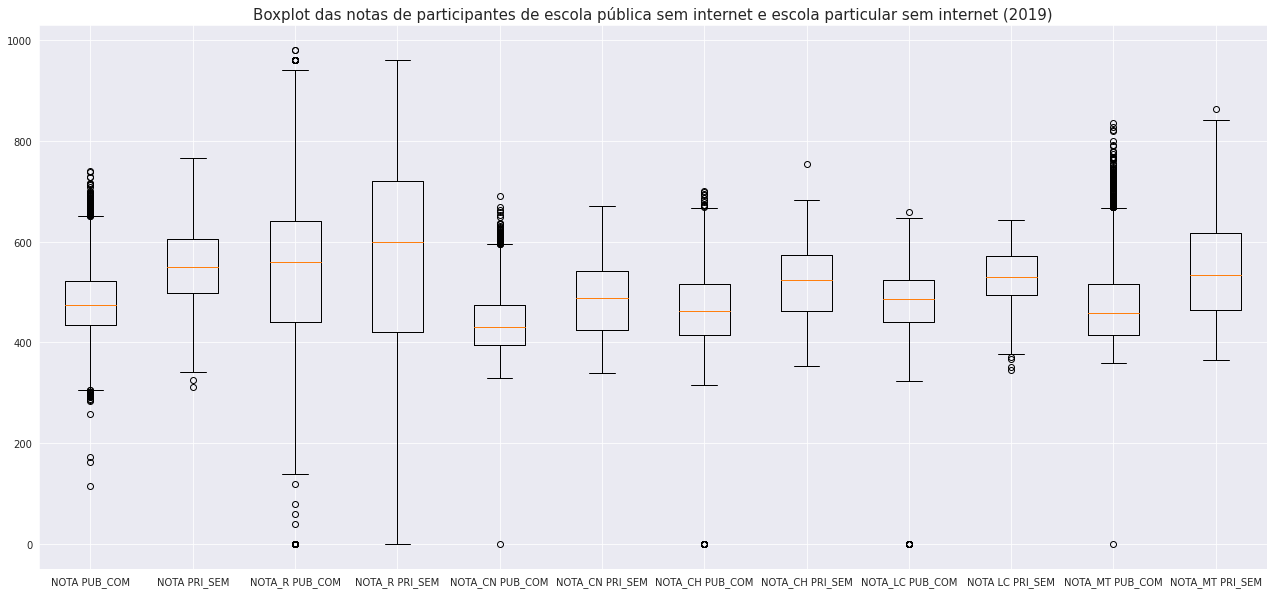

In [ ]:
plt.figure(figsize=(22,10))
plt.boxplot([ epub_2019_SEM.NOTA.dropna(),       epri_2019_SEM.NOTA.dropna(),
              epub_2019_SEM.NU_NOTA_REDACAO.dropna(), epri_2018_SEM.NU_NOTA_REDACAO.dropna(), 
              epub_2019_SEM.NU_NOTA_CN.dropna(), epri_2019_SEM.NU_NOTA_CN.dropna(),
              epub_2019_SEM.NU_NOTA_CH.dropna(), epri_2019_SEM.NU_NOTA_CH.dropna(),
              epub_2019_SEM.NU_NOTA_LC.dropna(), epri_2019_SEM.NU_NOTA_LC.dropna(),
              epub_2019_SEM.NU_NOTA_MT.dropna(), epri_2019_SEM.NU_NOTA_MT.dropna() 
            ])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['NOTA PUB_COM', "NOTA PRI_SEM", 'NOTA_R PUB_COM', "NOTA_R PRI_SEM", 'NOTA_CN PUB_COM', "NOTA_CN PRI_SEM", 
                           'NOTA_CH PUB_COM', "NOTA_CH PRI_SEM", 'NOTA_LC PUB_COM', "NOTA LC PRI_SEM", 'NOTA_MT PUB_COM', "NOTA_MT PRI_SEM"])
plt.title("Boxplot das notas de participantes de escola pública sem internet e escola particular sem internet (2019)",size=15)
plt.show()

# **Conclusões:**

É muito complicado se comparar escolas particulares com as escolas públicas paraíbanas, porém o fator *Internet* torna essa comparação um pouco mais possível de ser feita. Quando comparamos as escolas públicas com internet e a escola particular sem internet, conseguimos chegar em algum equilibrio entre as notas.

Apesar do número de participantes de escolas particulares sem internet ser bem pequeno em comparação ao número de participantes de escolas públicas com internet, podemos ver que, em 2017, por exemplo, as notas gerais máximas dos alunos de rede pública com o auxilio da internet é maior que a as de rede particular sem internet. E isso sem repete nesses 3 anos com a prova de matemática, linguagens e redação.

Porém perceba que a máxima conta também com os outliers. Se formos comparar as medianas, a escola particular, mesmo sem internet, continua com notas mais altas. E isso pode ser explicado pelo fato de que alguns estudantes de escola pública utilizam-se da internet para auxiliar seus estudos, pois a escola pública não tem condições de prover para ele com a mesma qualidade de materiais encontrados nas redes. Enquanto na particular os materiais de qualidade são providos com muito mais frequencia.

A internet consegue democratizar o acesso a informação, tornando possível a quem consiga acessa-lá, um mar de possibilidades. Hoje o número de sites e plataformas educacionais gratuitas na internet é gigantesco, e allguns "outliers" conseguiram tomar vantagem disso e talvez realizar seus sonhos.